In [1]:
from ase_interface import ANIENS,ensemblemolecule
import hdnntools as hdt

van Der Waals correction will be unavailable. Please install ased3


In [2]:
import theano
import sys
sys.path.append('/scratch/Gits/')
import HIPNN as hipnn

In [3]:
import numpy as np
import time
# ASE
import  ase
from ase.io import read, write

from ase.optimize import BFGS, LBFGS 
from ase.vibrations import Vibrations
from ase.vibrations import Infrared
from ase.thermochemistry import IdealGasThermo

import os

import sys

#figure plotting
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

In [4]:
mdir = '/nh/nest/u/jsmith/Research/dipole_molecules/small_molecules/all_ir_molecules_optimized/small4/'

In [5]:
ntdir = '/nh/nest/u/jsmith/scratch/Gits/ANI-Networks/networks/al_networks/ANI-AL-0808.0303.0400/'
cns = ntdir + 'train0/rHCNOSFCl-4.6A_16-3.1A_a4-8.params'
sae = ntdir + 'train0/sae_wb97x-631gd.dat'
nnf = ntdir + 'train'
Nn = 5

In [6]:
# Set NC
aens = ensemblemolecule(cns, sae, nnf, Nn, 0)

In [7]:
hippydir = '/nh/nest/u/jsmith/scratch/Research/harmonic_ir/hipmodels/gdb11-5nonEq-trained_models_patience-50_num-20/'
hippies = os.listdir(hippydir)
Nh = 1

hipnn.database.dipole_features["dipole"]="Chg"
hippymodels = [hipnn.Model.from_file(hippydir+hippy.rsplit(".",1)[0]) for hippy in hippies]
for hippy in hippymodels:
    hippy.compile()

MODEL UNPICKLED FROM DICT TYPE
MODEL UNPICKLED FROM DICT TYPE
MODEL UNPICKLED FROM DICT TYPE
MODEL UNPICKLED FROM DICT TYPE
No training params provided, network will be compiled only for prediction.
Compiling prediction function for network.
!Compilation mode not specified, using FAST_RUN.
Theano functions for network compiled!
No training params provided, network will be compiled only for prediction.
Compiling prediction function for network.
!Compilation mode not specified, using FAST_RUN.
Theano functions for network compiled!
No training params provided, network will be compiled only for prediction.
Compiling prediction function for network.
!Compilation mode not specified, using FAST_RUN.
Theano functions for network compiled!
No training params provided, network will be compiled only for prediction.
Compiling prediction function for network.
!Compilation mode not specified, using FAST_RUN.
Theano functions for network compiled!


In [8]:
#print(model.net_params["targets"])

In [13]:
for m in os.listdir(mdir):
    molecule = mdir+m
    
    # Read molecule
    print(molecule)
    mol = read(molecule)
    
    # Set ANI calculator
    mol.set_calculator(ANIENS(aens,sdmx=20000000.0))
    
    # Set HIP-NN calculator
    mol.calc.set_hipnn_dipole_model(hippymodels)
    
    mol.get_dipole_moment()
    e = mol.get_potential_energy()
    print('Total energy', e, 'eV')
    
    start_time = time.time()
    dyn = LBFGS(mol)
    dyn.run(fmax=0.00001)
    print('[ANI Total time:', time.time() - start_time, 'seconds]')
    
    hdt.writexyzfile(molecule.rsplit(".",1)[0]+'_opt.xyz',[mol.get_positions()],mol.get_chemical_symbols())
    
    fig=plt.figure(figsize=(20, 5), dpi= 80, facecolor='w', edgecolor='k')
    dlist = [i*0.001+0.000001 for i in range(100)]
    #lstyle = ['--','-.',':']
    ir_data = []
    for d in dlist:
        print(d)
        IR = Infrared(mol, delta=d) 
        #oldstd = sys.stdout
        #sys.stdout = None
        IR.run()
        #sys.stdout = oldstd
        #IR.summary()
    
        data = IR.get_spectrum(start=500,end=4500,width=1)
        
        ir_data.append(data[1].mean())
        
        #plt.plot(data[0],data[1],linewidth=1,ls=l,label=str(d))
        #plt.xlim(4500, 500)
        IR.clean()
    print('Done')
    #plt.legend()
    #plt.show()
    
    for ir in ir_data:
        print(ir)
    
    data = [IR.get_frequencies(method='standard', direction='central').real, IR.intensities]
    np.save(molecule.rsplit(".",1)[0]+'_ANI-HIPNN.npy',data)
    break

/nh/nest/u/jsmith/Research/dipole_molecules/small_molecules/all_ir_molecules_optimized/small4/Opt_dimethylacetamide.xyz
Total energy -7830.241579278158 eV
       Step     Time          Energy         fmax
LBFGS:    0 19:40:38    -7830.241579        0.2743
LBFGS:    1 19:40:38    -7830.243217        0.1806
LBFGS:    2 19:40:38    -7830.244312        0.1059
LBFGS:    3 19:40:38    -7830.245276        0.0873
LBFGS:    4 19:40:38    -7830.245602        0.0385
LBFGS:    5 19:40:38    -7830.245734        0.0323
LBFGS:    6 19:40:38    -7830.245817        0.0238
LBFGS:    7 19:40:38    -7830.245875        0.0227
LBFGS:    8 19:40:38    -7830.245908        0.0164
LBFGS:    9 19:40:38    -7830.245935        0.0127
LBFGS:   10 19:40:38    -7830.245951        0.0083
LBFGS:   11 19:40:38    -7830.245960        0.0079
LBFGS:   12 19:40:38    -7830.245971        0.0069
LBFGS:   13 19:40:38    -7830.245975        0.0074
LBFGS:   14 19:40:38    -7830.245981        0.0053
LBFGS:   15 19:40:38    -7830.

Writing ir-d0.000.5x+.pckl, dipole moment = (0.575139 -0.495754 -0.182937)
Writing ir-d0.000.5y-.pckl, dipole moment = (0.575140 -0.495753 -0.182937)
Writing ir-d0.000.5y+.pckl, dipole moment = (0.575141 -0.495755 -0.182937)
Writing ir-d0.000.5z-.pckl, dipole moment = (0.575140 -0.495754 -0.182937)
Writing ir-d0.000.5z+.pckl, dipole moment = (0.575140 -0.495754 -0.182938)
Writing ir-d0.000.6x-.pckl, dipole moment = (0.575140 -0.495754 -0.182937)
Writing ir-d0.000.6x+.pckl, dipole moment = (0.575140 -0.495754 -0.182937)
Writing ir-d0.000.6y-.pckl, dipole moment = (0.575140 -0.495754 -0.182937)
Writing ir-d0.000.6y+.pckl, dipole moment = (0.575140 -0.495754 -0.182937)
Writing ir-d0.000.6z-.pckl, dipole moment = (0.575140 -0.495754 -0.182937)
Writing ir-d0.000.6z+.pckl, dipole moment = (0.575140 -0.495754 -0.182937)
Writing ir-d0.000.7x-.pckl, dipole moment = (0.575140 -0.495754 -0.182937)
Writing ir-d0.000.7x+.pckl, dipole moment = (0.575140 -0.495754 -0.182937)
Writing ir-d0.000.7y-.pck

Writing ir-d0.001.8x+.pckl, dipole moment = (0.575074 -0.495820 -0.183030)
Writing ir-d0.001.8y-.pckl, dipole moment = (0.575138 -0.495784 -0.182971)
Writing ir-d0.001.8y+.pckl, dipole moment = (0.575142 -0.495724 -0.182904)
Writing ir-d0.001.8z-.pckl, dipole moment = (0.575281 -0.495738 -0.182898)
Writing ir-d0.001.8z+.pckl, dipole moment = (0.575000 -0.495770 -0.182977)
Writing ir-d0.001.9x-.pckl, dipole moment = (0.575131 -0.495792 -0.182993)
Writing ir-d0.001.9x+.pckl, dipole moment = (0.575149 -0.495716 -0.182881)
Writing ir-d0.001.9y-.pckl, dipole moment = (0.575140 -0.495804 -0.182991)
Writing ir-d0.001.9y+.pckl, dipole moment = (0.575141 -0.495704 -0.182883)
Writing ir-d0.001.9z-.pckl, dipole moment = (0.575021 -0.495754 -0.182825)
Writing ir-d0.001.9z+.pckl, dipole moment = (0.575259 -0.495754 -0.183049)
Writing ir-d0.001.10x-.pckl, dipole moment = (0.575141 -0.495667 -0.182937)
Writing ir-d0.001.10x+.pckl, dipole moment = (0.575139 -0.495841 -0.182938)
Writing ir-d0.001.10y-.

Writing ir-d0.002.11x+.pckl, dipole moment = (0.575009 -0.495632 -0.183062)
Writing ir-d0.002.11y-.pckl, dipole moment = (0.575090 -0.495866 -0.182898)
Writing ir-d0.002.11y+.pckl, dipole moment = (0.575189 -0.495641 -0.182977)
Writing ir-d0.002.11z-.pckl, dipole moment = (0.575411 -0.495793 -0.182849)
Writing ir-d0.002.11z+.pckl, dipole moment = (0.574869 -0.495714 -0.183027)
Writing ir-d0.002.12x-.pckl, dipole moment = (0.575010 -0.495757 -0.183054)
Writing ir-d0.002.12x+.pckl, dipole moment = (0.575270 -0.495751 -0.182820)
Writing ir-d0.002.12y-.pckl, dipole moment = (0.575165 -0.495779 -0.182848)
Writing ir-d0.002.12y+.pckl, dipole moment = (0.575115 -0.495728 -0.183026)
Writing ir-d0.002.12z-.pckl, dipole moment = (0.575065 -0.495612 -0.182789)
Writing ir-d0.002.12z+.pckl, dipole moment = (0.575216 -0.495896 -0.183084)
Writing ir-d0.002.13x-.pckl, dipole moment = (0.575221 -0.495734 -0.182985)
Writing ir-d0.002.13x+.pckl, dipole moment = (0.575061 -0.495773 -0.182889)
Writing ir-d

Writing ir-d0.003.14x+.pckl, dipole moment = (0.575186 -0.495601 -0.183175)
Writing ir-d0.003.14y-.pckl, dipole moment = (0.575071 -0.495684 -0.183090)
Writing ir-d0.003.14y+.pckl, dipole moment = (0.575209 -0.495821 -0.182786)
Writing ir-d0.003.14z-.pckl, dipole moment = (0.575334 -0.495961 -0.182973)
Writing ir-d0.003.14z+.pckl, dipole moment = (0.574946 -0.495547 -0.182904)
0.004001
Writing ir-d0.004.eq.pckl, dipole moment = (0.575140 -0.495754 -0.182937)
Writing ir-d0.004.0x-.pckl, dipole moment = (0.574409 -0.496623 -0.183139)
Writing ir-d0.004.0x+.pckl, dipole moment = (0.575864 -0.494892 -0.182738)
Writing ir-d0.004.0y-.pckl, dipole moment = (0.573897 -0.497128 -0.182735)
Writing ir-d0.004.0y+.pckl, dipole moment = (0.576393 -0.494392 -0.183141)
Writing ir-d0.004.0z-.pckl, dipole moment = (0.574881 -0.495627 -0.183988)
Writing ir-d0.004.0z+.pckl, dipole moment = (0.575393 -0.495889 -0.181886)
Writing ir-d0.004.1x-.pckl, dipole moment = (0.580367 -0.496198 -0.183753)
Writing ir-d

Writing ir-d0.005.2x-.pckl, dipole moment = (0.573571 -0.494470 -0.182743)
Writing ir-d0.005.2x+.pckl, dipole moment = (0.576700 -0.497026 -0.183132)
Writing ir-d0.005.2y-.pckl, dipole moment = (0.576638 -0.497340 -0.183237)
Writing ir-d0.005.2y+.pckl, dipole moment = (0.573649 -0.494145 -0.182638)
Writing ir-d0.005.2z-.pckl, dipole moment = (0.575362 -0.496008 -0.184526)
Writing ir-d0.005.2z+.pckl, dipole moment = (0.574910 -0.495490 -0.181339)
Writing ir-d0.005.3x-.pckl, dipole moment = (0.565713 -0.495457 -0.181260)
Writing ir-d0.005.3x+.pckl, dipole moment = (0.584531 -0.496043 -0.184609)
Writing ir-d0.005.3y-.pckl, dipole moment = (0.575410 -0.500748 -0.183571)
Writing ir-d0.005.3y+.pckl, dipole moment = (0.574818 -0.490718 -0.182289)
Writing ir-d0.005.3z-.pckl, dipole moment = (0.576805 -0.496388 -0.184349)
Writing ir-d0.005.3z+.pckl, dipole moment = (0.573472 -0.495114 -0.181519)
Writing ir-d0.005.4x-.pckl, dipole moment = (0.575405 -0.494875 -0.182925)
Writing ir-d0.005.4x+.pck

Writing ir-d0.006.5x-.pckl, dipole moment = (0.581185 -0.496727 -0.183810)
Writing ir-d0.006.5x+.pckl, dipole moment = (0.569069 -0.494777 -0.182056)
Writing ir-d0.006.5y-.pckl, dipole moment = (0.572704 -0.490170 -0.181980)
Writing ir-d0.006.5y+.pckl, dipole moment = (0.577532 -0.501312 -0.183879)
Writing ir-d0.006.5z-.pckl, dipole moment = (0.574066 -0.495094 -0.180370)
Writing ir-d0.006.5z+.pckl, dipole moment = (0.576228 -0.496425 -0.185513)
Writing ir-d0.006.6x-.pckl, dipole moment = (0.574919 -0.496251 -0.183061)
Writing ir-d0.006.6x+.pckl, dipole moment = (0.575356 -0.495270 -0.182813)
Writing ir-d0.006.6y-.pckl, dipole moment = (0.575005 -0.495910 -0.182864)
Writing ir-d0.006.6y+.pckl, dipole moment = (0.575271 -0.495607 -0.183011)
Writing ir-d0.006.6z-.pckl, dipole moment = (0.575070 -0.495610 -0.183400)
Writing ir-d0.006.6z+.pckl, dipole moment = (0.575215 -0.495899 -0.182478)
Writing ir-d0.006.7x-.pckl, dipole moment = (0.575058 -0.495327 -0.183240)
Writing ir-d0.006.7x+.pck

Writing ir-d0.007.8x-.pckl, dipole moment = (0.575595 -0.495293 -0.182294)
Writing ir-d0.007.8x+.pckl, dipole moment = (0.574677 -0.496215 -0.183588)
Writing ir-d0.007.8y-.pckl, dipole moment = (0.575119 -0.495966 -0.183174)
Writing ir-d0.007.8y+.pckl, dipole moment = (0.575150 -0.495549 -0.182705)
Writing ir-d0.007.8z-.pckl, dipole moment = (0.576120 -0.495643 -0.182669)
Writing ir-d0.007.8z+.pckl, dipole moment = (0.574154 -0.495872 -0.183226)
Writing ir-d0.007.9x-.pckl, dipole moment = (0.575078 -0.496022 -0.183327)
Writing ir-d0.007.9x+.pckl, dipole moment = (0.575203 -0.495487 -0.182541)
Writing ir-d0.007.9y-.pckl, dipole moment = (0.575133 -0.496103 -0.183310)
Writing ir-d0.007.9y+.pckl, dipole moment = (0.575138 -0.495404 -0.182558)
Writing ir-d0.007.9z-.pckl, dipole moment = (0.574306 -0.495750 -0.182140)
Writing ir-d0.007.9z+.pckl, dipole moment = (0.575968 -0.495752 -0.183710)
Writing ir-d0.007.10x-.pckl, dipole moment = (0.575142 -0.495136 -0.182930)
Writing ir-d0.007.10x+.p

Writing ir-d0.008.11x-.pckl, dipole moment = (0.575660 -0.496240 -0.182444)
Writing ir-d0.008.11x+.pckl, dipole moment = (0.574610 -0.495264 -0.183439)
Writing ir-d0.008.11y-.pckl, dipole moment = (0.574934 -0.496201 -0.182781)
Writing ir-d0.008.11y+.pckl, dipole moment = (0.575331 -0.495302 -0.183098)
Writing ir-d0.008.11z-.pckl, dipole moment = (0.576220 -0.495908 -0.182592)
Writing ir-d0.008.11z+.pckl, dipole moment = (0.574051 -0.495590 -0.183302)
Writing ir-d0.008.12x-.pckl, dipole moment = (0.574618 -0.495767 -0.183399)
Writing ir-d0.008.12x+.pckl, dipole moment = (0.575655 -0.495741 -0.182466)
Writing ir-d0.008.12y-.pckl, dipole moment = (0.575243 -0.495852 -0.182575)
Writing ir-d0.008.12y+.pckl, dipole moment = (0.575042 -0.495646 -0.183285)
Writing ir-d0.008.12z-.pckl, dipole moment = (0.574842 -0.495185 -0.182338)
Writing ir-d0.008.12z+.pckl, dipole moment = (0.575445 -0.496318 -0.183516)
Writing ir-d0.008.13x-.pckl, dipole moment = (0.575472 -0.495672 -0.183130)
Writing ir-d

Writing ir-d0.009.14x-.pckl, dipole moment = (0.574994 -0.496210 -0.182229)
Writing ir-d0.009.14x+.pckl, dipole moment = (0.575271 -0.495294 -0.183652)
Writing ir-d0.009.14y-.pckl, dipole moment = (0.574933 -0.495536 -0.183402)
Writing ir-d0.009.14y+.pckl, dipole moment = (0.575347 -0.495947 -0.182489)
Writing ir-d0.009.14z-.pckl, dipole moment = (0.575721 -0.496373 -0.183052)
Writing ir-d0.009.14z+.pckl, dipole moment = (0.574559 -0.495131 -0.182843)
0.010001
Writing ir-d0.010.eq.pckl, dipole moment = (0.575140 -0.495754 -0.182937)
Writing ir-d0.010.0x-.pckl, dipole moment = (0.573298 -0.497938 -0.183445)
Writing ir-d0.010.0x+.pckl, dipole moment = (0.576935 -0.493613 -0.182443)
Writing ir-d0.010.0y-.pckl, dipole moment = (0.572050 -0.499212 -0.182434)
Writing ir-d0.010.0y+.pckl, dipole moment = (0.578286 -0.492372 -0.183450)
Writing ir-d0.010.0z-.pckl, dipole moment = (0.574481 -0.495452 -0.185562)
Writing ir-d0.010.0z+.pckl, dipole moment = (0.575761 -0.496107 -0.180307)
Writing ir-

Writing ir-d0.011.1z+.pckl, dipole moment = (0.576720 -0.496488 -0.187086)
Writing ir-d0.011.2x-.pckl, dipole moment = (0.571675 -0.492915 -0.182510)
Writing ir-d0.011.2x+.pckl, dipole moment = (0.578557 -0.498534 -0.183366)
Writing ir-d0.011.2y-.pckl, dipole moment = (0.578440 -0.499213 -0.183596)
Writing ir-d0.011.2y+.pckl, dipole moment = (0.571869 -0.492183 -0.182279)
Writing ir-d0.011.2z-.pckl, dipole moment = (0.575616 -0.496300 -0.186420)
Writing ir-d0.011.2z+.pckl, dipole moment = (0.574622 -0.495162 -0.179409)
Writing ir-d0.011.3x-.pckl, dipole moment = (0.554366 -0.495084 -0.179243)
Writing ir-d0.011.3x+.pckl, dipole moment = (0.595740 -0.496384 -0.186607)
Writing ir-d0.011.3y-.pckl, dipole moment = (0.575669 -0.506684 -0.184314)
Writing ir-d0.011.3y+.pckl, dipole moment = (0.574357 -0.484617 -0.181490)
Writing ir-d0.011.3z-.pckl, dipole moment = (0.578798 -0.497141 -0.186032)
Writing ir-d0.011.3z+.pckl, dipole moment = (0.571467 -0.494340 -0.179808)
Writing ir-d0.011.4x-.pck

Writing ir-d0.012.4z+.pckl, dipole moment = (0.575194 -0.495870 -0.182165)
Writing ir-d0.012.5x-.pckl, dipole moment = (0.587203 -0.497700 -0.184676)
Writing ir-d0.012.5x+.pckl, dipole moment = (0.562969 -0.493794 -0.181167)
Writing ir-d0.012.5y-.pckl, dipole moment = (0.570218 -0.484558 -0.181006)
Writing ir-d0.012.5y+.pckl, dipole moment = (0.579889 -0.506847 -0.184809)
Writing ir-d0.012.5z-.pckl, dipole moment = (0.573007 -0.494444 -0.177812)
Writing ir-d0.012.5z+.pckl, dipole moment = (0.577329 -0.497107 -0.188097)
Writing ir-d0.012.6x-.pckl, dipole moment = (0.574691 -0.496763 -0.183183)
Writing ir-d0.012.6x+.pckl, dipole moment = (0.575566 -0.494800 -0.182687)
Writing ir-d0.012.6y-.pckl, dipole moment = (0.574866 -0.496076 -0.182790)
Writing ir-d0.012.6y+.pckl, dipole moment = (0.575399 -0.495470 -0.183085)
Writing ir-d0.012.6z-.pckl, dipole moment = (0.575005 -0.495466 -0.183866)
Writing ir-d0.012.6z+.pckl, dipole moment = (0.575296 -0.496044 -0.182022)
Writing ir-d0.012.7x-.pck

Writing ir-d0.013.7z+.pckl, dipole moment = (0.576605 -0.494815 -0.184353)
Writing ir-d0.013.8x-.pckl, dipole moment = (0.575977 -0.494898 -0.181750)
Writing ir-d0.013.8x+.pckl, dipole moment = (0.574274 -0.496609 -0.184151)
Writing ir-d0.013.8y-.pckl, dipole moment = (0.575091 -0.496152 -0.183381)
Writing ir-d0.013.8y+.pckl, dipole moment = (0.575150 -0.495379 -0.182510)
Writing ir-d0.013.8z-.pckl, dipole moment = (0.576954 -0.495554 -0.182455)
Writing ir-d0.013.8z+.pckl, dipole moment = (0.573303 -0.495979 -0.183489)
Writing ir-d0.013.9x-.pckl, dipole moment = (0.575026 -0.496251 -0.183657)
Writing ir-d0.013.9x+.pckl, dipole moment = (0.575257 -0.495259 -0.182197)
Writing ir-d0.013.9y-.pckl, dipole moment = (0.575118 -0.496401 -0.183624)
Writing ir-d0.013.9y+.pckl, dipole moment = (0.575129 -0.495104 -0.182227)
Writing ir-d0.013.9z-.pckl, dipole moment = (0.573585 -0.495742 -0.181437)
Writing ir-d0.013.9z+.pckl, dipole moment = (0.576673 -0.495745 -0.184354)
Writing ir-d0.013.10x-.pc

Writing ir-d0.014.10z+.pckl, dipole moment = (0.575294 -0.495824 -0.182110)
Writing ir-d0.014.11x-.pckl, dipole moment = (0.576042 -0.496601 -0.182080)
Writing ir-d0.014.11x+.pckl, dipole moment = (0.574207 -0.494894 -0.183821)
Writing ir-d0.014.11y-.pckl, dipole moment = (0.574768 -0.496532 -0.182668)
Writing ir-d0.014.11y+.pckl, dipole moment = (0.575464 -0.494959 -0.183223)
Writing ir-d0.014.11z-.pckl, dipole moment = (0.577023 -0.496016 -0.182347)
Writing ir-d0.014.11z+.pckl, dipole moment = (0.573227 -0.495461 -0.183588)
Writing ir-d0.014.12x-.pckl, dipole moment = (0.574221 -0.495777 -0.183739)
Writing ir-d0.014.12x+.pckl, dipole moment = (0.576036 -0.495730 -0.182108)
Writing ir-d0.014.12y-.pckl, dipole moment = (0.575323 -0.495919 -0.182294)
Writing ir-d0.014.12y+.pckl, dipole moment = (0.574972 -0.495558 -0.183538)
Writing ir-d0.014.12z-.pckl, dipole moment = (0.574621 -0.494754 -0.181876)
Writing ir-d0.014.12z+.pckl, dipole moment = (0.575677 -0.496739 -0.183937)
Writing ir-d

Writing ir-d0.015.13z+.pckl, dipole moment = (0.575577 -0.495782 -0.181648)
Writing ir-d0.015.14x-.pckl, dipole moment = (0.574888 -0.496511 -0.181762)
Writing ir-d0.015.14x+.pckl, dipole moment = (0.575351 -0.494985 -0.184133)
Writing ir-d0.015.14y-.pckl, dipole moment = (0.574794 -0.495377 -0.183720)
Writing ir-d0.015.14y+.pckl, dipole moment = (0.575484 -0.496061 -0.182199)
Writing ir-d0.015.14z-.pckl, dipole moment = (0.576108 -0.496783 -0.183140)
Writing ir-d0.015.14z+.pckl, dipole moment = (0.574172 -0.494713 -0.182792)
0.016001
Writing ir-d0.016.eq.pckl, dipole moment = (0.575140 -0.495754 -0.182937)
Writing ir-d0.016.0x-.pckl, dipole moment = (0.572171 -0.499267 -0.183755)
Writing ir-d0.016.0x+.pckl, dipole moment = (0.577990 -0.492352 -0.182153)
Writing ir-d0.016.0y-.pckl, dipole moment = (0.570228 -0.501324 -0.182137)
Writing ir-d0.016.0y+.pckl, dipole moment = (0.580194 -0.490380 -0.183761)
Writing ir-d0.016.0z-.pckl, dipole moment = (0.574069 -0.495296 -0.187134)
Writing ir

Writing ir-d0.017.1z-.pckl, dipole moment = (0.572400 -0.494562 -0.176459)
Writing ir-d0.017.1z+.pckl, dipole moment = (0.577518 -0.496876 -0.189336)
Writing ir-d0.017.2x-.pckl, dipole moment = (0.569766 -0.491345 -0.182278)
Writing ir-d0.017.2x+.pckl, dipole moment = (0.580398 -0.500024 -0.183599)
Writing ir-d0.017.2y-.pckl, dipole moment = (0.580245 -0.501052 -0.183953)
Writing ir-d0.017.2y+.pckl, dipole moment = (0.570104 -0.490189 -0.181921)
Writing ir-d0.017.2z-.pckl, dipole moment = (0.575858 -0.496577 -0.188300)
Writing ir-d0.017.2z+.pckl, dipole moment = (0.574323 -0.494822 -0.177466)
Writing ir-d0.017.3x-.pckl, dipole moment = (0.542990 -0.494688 -0.177222)
Writing ir-d0.017.3x+.pckl, dipole moment = (0.606874 -0.496728 -0.188595)
Writing ir-d0.017.3y-.pckl, dipole moment = (0.575869 -0.512563 -0.185040)
Writing ir-d0.017.3y+.pckl, dipole moment = (0.573812 -0.478452 -0.180668)
Writing ir-d0.017.3z-.pckl, dipole moment = (0.580785 -0.497886 -0.187705)
Writing ir-d0.017.3z+.pck

Writing ir-d0.018.4z-.pckl, dipole moment = (0.575079 -0.495489 -0.184056)
Writing ir-d0.018.4z+.pckl, dipole moment = (0.575223 -0.495912 -0.181774)
Writing ir-d0.018.5x-.pckl, dipole moment = (0.593199 -0.498676 -0.185536)
Writing ir-d0.018.5x+.pckl, dipole moment = (0.556840 -0.492802 -0.180268)
Writing ir-d0.018.5y-.pckl, dipole moment = (0.567676 -0.478917 -0.180014)
Writing ir-d0.018.5y+.pckl, dipole moment = (0.582220 -0.512364 -0.185729)
Writing ir-d0.018.5z-.pckl, dipole moment = (0.571962 -0.493805 -0.175263)
Writing ir-d0.018.5z+.pckl, dipole moment = (0.578444 -0.497799 -0.190690)
Writing ir-d0.018.6x-.pckl, dipole moment = (0.574456 -0.497288 -0.183305)
Writing ir-d0.018.6x+.pckl, dipole moment = (0.575772 -0.494343 -0.182561)
Writing ir-d0.018.6y-.pckl, dipole moment = (0.574724 -0.496252 -0.182717)
Writing ir-d0.018.6y+.pckl, dipole moment = (0.575522 -0.495343 -0.183158)
Writing ir-d0.018.6z-.pckl, dipole moment = (0.574944 -0.495323 -0.184335)
Writing ir-d0.018.6z+.pck

Writing ir-d0.019.7z-.pckl, dipole moment = (0.572987 -0.497207 -0.180756)
Writing ir-d0.019.7z+.pckl, dipole moment = (0.577279 -0.494399 -0.184985)
Writing ir-d0.019.8x-.pckl, dipole moment = (0.576353 -0.494505 -0.181212)
Writing ir-d0.019.8x+.pckl, dipole moment = (0.573865 -0.497002 -0.184720)
Writing ir-d0.019.8y-.pckl, dipole moment = (0.575055 -0.496344 -0.183591)
Writing ir-d0.019.8y+.pckl, dipole moment = (0.575140 -0.495213 -0.182319)
Writing ir-d0.019.8z-.pckl, dipole moment = (0.577785 -0.495470 -0.182256)
Writing ir-d0.019.8z+.pckl, dipole moment = (0.572446 -0.496090 -0.183766)
Writing ir-d0.019.9x-.pckl, dipole moment = (0.574973 -0.496482 -0.183982)
Writing ir-d0.019.9x+.pckl, dipole moment = (0.575311 -0.495031 -0.181849)
Writing ir-d0.019.9y-.pckl, dipole moment = (0.575097 -0.496699 -0.183933)
Writing ir-d0.019.9y+.pckl, dipole moment = (0.575113 -0.494804 -0.181892)
Writing ir-d0.019.9z-.pckl, dipole moment = (0.572860 -0.495732 -0.180717)
Writing ir-d0.019.9z+.pck

Writing ir-d0.020.10z-.pckl, dipole moment = (0.574967 -0.495609 -0.184124)
Writing ir-d0.020.10z+.pckl, dipole moment = (0.575368 -0.495846 -0.181756)
Writing ir-d0.020.11x-.pckl, dipole moment = (0.576418 -0.496959 -0.181720)
Writing ir-d0.020.11x+.pckl, dipole moment = (0.573799 -0.494523 -0.184207)
Writing ir-d0.020.11y-.pckl, dipole moment = (0.574593 -0.496859 -0.182558)
Writing ir-d0.020.11y+.pckl, dipole moment = (0.575589 -0.494613 -0.183350)
Writing ir-d0.020.11z-.pckl, dipole moment = (0.577822 -0.496118 -0.182112)
Writing ir-d0.020.11z+.pckl, dipole moment = (0.572397 -0.495328 -0.183886)
Writing ir-d0.020.12x-.pckl, dipole moment = (0.573819 -0.495787 -0.184073)
Writing ir-d0.020.12x+.pckl, dipole moment = (0.576413 -0.495720 -0.181744)
Writing ir-d0.020.12y-.pckl, dipole moment = (0.575405 -0.495979 -0.182006)
Writing ir-d0.020.12y+.pckl, dipole moment = (0.574905 -0.495464 -0.183782)
Writing ir-d0.020.12z-.pckl, dipole moment = (0.574404 -0.494322 -0.181404)
Writing ir-d

Writing ir-d0.021.13z-.pckl, dipole moment = (0.574551 -0.495748 -0.184774)
Writing ir-d0.021.13z+.pckl, dipole moment = (0.575756 -0.495798 -0.181137)
Writing ir-d0.021.14x-.pckl, dipole moment = (0.574774 -0.496811 -0.181297)
Writing ir-d0.021.14x+.pckl, dipole moment = (0.575426 -0.494674 -0.184616)
Writing ir-d0.021.14y-.pckl, dipole moment = (0.574654 -0.495207 -0.184045)
Writing ir-d0.021.14y+.pckl, dipole moment = (0.575621 -0.496164 -0.181917)
Writing ir-d0.021.14z-.pckl, dipole moment = (0.576495 -0.497193 -0.183238)
Writing ir-d0.021.14z+.pckl, dipole moment = (0.573786 -0.494292 -0.182749)
0.022001
Writing ir-d0.022.eq.pckl, dipole moment = (0.575140 -0.495754 -0.182937)
Writing ir-d0.022.0x-.pckl, dipole moment = (0.571026 -0.500607 -0.184070)
Writing ir-d0.022.0x+.pckl, dipole moment = (0.579027 -0.491108 -0.181869)
Writing ir-d0.022.0y-.pckl, dipole moment = (0.568431 -0.503465 -0.181844)
Writing ir-d0.022.0y+.pckl, dipole moment = (0.582116 -0.488414 -0.184074)
Writing i

Writing ir-d0.023.1y+.pckl, dipole moment = (0.569275 -0.511007 -0.182891)
Writing ir-d0.023.1z-.pckl, dipole moment = (0.571347 -0.494126 -0.174153)
Writing ir-d0.023.1z+.pckl, dipole moment = (0.578269 -0.497254 -0.191575)
Writing ir-d0.023.2x-.pckl, dipole moment = (0.567843 -0.489761 -0.182047)
Writing ir-d0.023.2x+.pckl, dipole moment = (0.582224 -0.501492 -0.183832)
Writing ir-d0.023.2y-.pckl, dipole moment = (0.582051 -0.502859 -0.184309)
Writing ir-d0.023.2y+.pckl, dipole moment = (0.568354 -0.488161 -0.181565)
Writing ir-d0.023.2z-.pckl, dipole moment = (0.576087 -0.496839 -0.190166)
Writing ir-d0.023.2z+.pckl, dipole moment = (0.574013 -0.494470 -0.175511)
Writing ir-d0.023.3x-.pckl, dipole moment = (0.531599 -0.494263 -0.175198)
Writing ir-d0.023.3x+.pckl, dipole moment = (0.617924 -0.497082 -0.190573)
Writing ir-d0.023.3y-.pckl, dipole moment = (0.576020 -0.518387 -0.185752)
Writing ir-d0.023.3y+.pckl, dipole moment = (0.573182 -0.472225 -0.179822)
Writing ir-d0.023.3z-.pck

Writing ir-d0.024.4y+.pckl, dipole moment = (0.571739 -0.501775 -0.183411)
Writing ir-d0.024.4z-.pckl, dipole moment = (0.575066 -0.495375 -0.184416)
Writing ir-d0.024.4z+.pckl, dipole moment = (0.575252 -0.495943 -0.181380)
Writing ir-d0.024.5x-.pckl, dipole moment = (0.599174 -0.499657 -0.186392)
Writing ir-d0.024.5x+.pckl, dipole moment = (0.550679 -0.491800 -0.179359)
Writing ir-d0.024.5y-.pckl, dipole moment = (0.565075 -0.473246 -0.179003)
Writing ir-d0.024.5y+.pckl, dipole moment = (0.584535 -0.517869 -0.186642)
Writing ir-d0.024.5z-.pckl, dipole moment = (0.570931 -0.493178 -0.172722)
Writing ir-d0.024.5z+.pckl, dipole moment = (0.579573 -0.498502 -0.193292)
Writing ir-d0.024.6x-.pckl, dipole moment = (0.574214 -0.497828 -0.183425)
Writing ir-d0.024.6x+.pckl, dipole moment = (0.575973 -0.493898 -0.182434)
Writing ir-d0.024.6y-.pckl, dipole moment = (0.574579 -0.496437 -0.182644)
Writing ir-d0.024.6y+.pckl, dipole moment = (0.575641 -0.495225 -0.183232)
Writing ir-d0.024.6z-.pck

Writing ir-d0.025.7y+.pckl, dipole moment = (0.574026 -0.495269 -0.182735)
Writing ir-d0.025.7z-.pckl, dipole moment = (0.572304 -0.497681 -0.180039)
Writing ir-d0.025.7z+.pckl, dipole moment = (0.577953 -0.493995 -0.185605)
Writing ir-d0.025.8x-.pckl, dipole moment = (0.576721 -0.494113 -0.180680)
Writing ir-d0.025.8x+.pckl, dipole moment = (0.573452 -0.497392 -0.185293)
Writing ir-d0.025.8y-.pckl, dipole moment = (0.575011 -0.496540 -0.183804)
Writing ir-d0.025.8y+.pckl, dipole moment = (0.575121 -0.495053 -0.182132)
Writing ir-d0.025.8z-.pckl, dipole moment = (0.578613 -0.495392 -0.182071)
Writing ir-d0.025.8z+.pckl, dipole moment = (0.571584 -0.496206 -0.184058)
Writing ir-d0.025.9x-.pckl, dipole moment = (0.574921 -0.496712 -0.184302)
Writing ir-d0.025.9x+.pckl, dipole moment = (0.575367 -0.494804 -0.181496)
Writing ir-d0.025.9y-.pckl, dipole moment = (0.575069 -0.496996 -0.184236)
Writing ir-d0.025.9y+.pckl, dipole moment = (0.575090 -0.494502 -0.181552)
Writing ir-d0.025.9z-.pck

Writing ir-d0.026.10y+.pckl, dipole moment = (0.574823 -0.498060 -0.183454)
Writing ir-d0.026.10z-.pckl, dipole moment = (0.574927 -0.495555 -0.184481)
Writing ir-d0.026.10z+.pckl, dipole moment = (0.575446 -0.495863 -0.181404)
Writing ir-d0.026.11x-.pckl, dipole moment = (0.576787 -0.497312 -0.181365)
Writing ir-d0.026.11x+.pckl, dipole moment = (0.573386 -0.494151 -0.184598)
Writing ir-d0.026.11y-.pckl, dipole moment = (0.574409 -0.497182 -0.182451)
Writing ir-d0.026.11y+.pckl, dipole moment = (0.575705 -0.494265 -0.183480)
Writing ir-d0.026.11z-.pckl, dipole moment = (0.578616 -0.496213 -0.181888)
Writing ir-d0.026.11z+.pckl, dipole moment = (0.571562 -0.495190 -0.184194)
Writing ir-d0.026.12x-.pckl, dipole moment = (0.573411 -0.495796 -0.184402)
Writing ir-d0.026.12x+.pckl, dipole moment = (0.576787 -0.495709 -0.181376)
Writing ir-d0.026.12y-.pckl, dipole moment = (0.575491 -0.496034 -0.181710)
Writing ir-d0.026.12y+.pckl, dipole moment = (0.574840 -0.495365 -0.184018)
Writing ir-d

Writing ir-d0.027.13y+.pckl, dipole moment = (0.575779 -0.493823 -0.183136)
Writing ir-d0.027.13z-.pckl, dipole moment = (0.574387 -0.495754 -0.185305)
Writing ir-d0.027.13z+.pckl, dipole moment = (0.575937 -0.495817 -0.180630)
Writing ir-d0.027.14x-.pckl, dipole moment = (0.574652 -0.497109 -0.180837)
Writing ir-d0.027.14x+.pckl, dipole moment = (0.575495 -0.494360 -0.185102)
Writing ir-d0.027.14y-.pckl, dipole moment = (0.574514 -0.495027 -0.184377)
Writing ir-d0.027.14y+.pckl, dipole moment = (0.575757 -0.496255 -0.181643)
Writing ir-d0.027.14z-.pckl, dipole moment = (0.576880 -0.497602 -0.183346)
Writing ir-d0.027.14z+.pckl, dipole moment = (0.573400 -0.493868 -0.182715)
0.028001
Writing ir-d0.028.eq.pckl, dipole moment = (0.575140 -0.495754 -0.182937)
Writing ir-d0.028.0x-.pckl, dipole moment = (0.569866 -0.501957 -0.184388)
Writing ir-d0.028.0x+.pckl, dipole moment = (0.580049 -0.489883 -0.181589)
Writing ir-d0.028.0y-.pckl, dipole moment = (0.566662 -0.505635 -0.181555)
Writing 

Writing ir-d0.029.1y-.pckl, dipole moment = (0.582281 -0.476612 -0.182954)
Writing ir-d0.029.1y+.pckl, dipole moment = (0.567725 -0.514980 -0.182875)
Writing ir-d0.029.1z-.pckl, dipole moment = (0.570250 -0.493682 -0.171837)
Writing ir-d0.029.1z+.pckl, dipole moment = (0.578974 -0.497622 -0.193805)
Writing ir-d0.029.2x-.pckl, dipole moment = (0.565908 -0.488164 -0.181818)
Writing ir-d0.029.2x+.pckl, dipole moment = (0.584035 -0.502939 -0.184064)
Writing ir-d0.029.2y-.pckl, dipole moment = (0.583855 -0.504635 -0.184662)
Writing ir-d0.029.2y+.pckl, dipole moment = (0.566624 -0.486101 -0.181211)
Writing ir-d0.029.2z-.pckl, dipole moment = (0.576305 -0.497087 -0.192018)
Writing ir-d0.029.2z+.pckl, dipole moment = (0.573693 -0.494108 -0.173543)
Writing ir-d0.029.3x-.pckl, dipole moment = (0.520203 -0.493803 -0.173172)
Writing ir-d0.029.3x+.pckl, dipole moment = (0.628881 -0.497455 -0.192539)
Writing ir-d0.029.3y-.pckl, dipole moment = (0.576135 -0.524158 -0.186452)
Writing ir-d0.029.3y+.pck

Writing ir-d0.030.4y-.pckl, dipole moment = (0.578610 -0.488421 -0.182321)
Writing ir-d0.030.4y+.pckl, dipole moment = (0.570795 -0.503300 -0.183525)
Writing ir-d0.030.4z-.pckl, dipole moment = (0.575057 -0.495247 -0.184767)
Writing ir-d0.030.4z+.pckl, dipole moment = (0.575281 -0.495963 -0.180984)
Writing ir-d0.030.5x-.pckl, dipole moment = (0.605131 -0.500648 -0.187244)
Writing ir-d0.030.5x+.pckl, dipole moment = (0.544487 -0.490783 -0.178440)
Writing ir-d0.030.5y-.pckl, dipole moment = (0.562414 -0.467548 -0.177972)
Writing ir-d0.030.5y+.pckl, dipole moment = (0.586844 -0.523368 -0.187551)
Writing ir-d0.030.5z-.pckl, dipole moment = (0.569916 -0.492561 -0.170190)
Writing ir-d0.030.5z+.pckl, dipole moment = (0.580715 -0.499216 -0.195902)
Writing ir-d0.030.6x-.pckl, dipole moment = (0.573964 -0.498381 -0.183544)
Writing ir-d0.030.6x+.pckl, dipole moment = (0.576171 -0.493464 -0.182307)
Writing ir-d0.030.6y-.pckl, dipole moment = (0.574431 -0.496631 -0.182571)
Writing ir-d0.030.6y+.pck

Writing ir-d0.031.7y-.pckl, dipole moment = (0.576332 -0.496544 -0.183022)
Writing ir-d0.031.7y+.pckl, dipole moment = (0.573737 -0.495174 -0.182666)
Writing ir-d0.031.7z-.pckl, dipole moment = (0.571620 -0.498160 -0.179310)
Writing ir-d0.031.7z+.pckl, dipole moment = (0.578629 -0.493604 -0.186212)
Writing ir-d0.031.8x-.pckl, dipole moment = (0.577081 -0.493723 -0.180155)
Writing ir-d0.031.8x+.pckl, dipole moment = (0.573034 -0.497778 -0.185870)
Writing ir-d0.031.8y-.pckl, dipole moment = (0.574960 -0.496741 -0.184020)
Writing ir-d0.031.8y+.pckl, dipole moment = (0.575092 -0.494898 -0.181948)
Writing ir-d0.031.8z-.pckl, dipole moment = (0.579438 -0.495320 -0.181902)
Writing ir-d0.031.8z+.pckl, dipole moment = (0.570715 -0.496326 -0.184364)
Writing ir-d0.031.9x-.pckl, dipole moment = (0.574869 -0.496942 -0.184618)
Writing ir-d0.031.9x+.pckl, dipole moment = (0.575423 -0.494579 -0.181140)
Writing ir-d0.031.9y-.pckl, dipole moment = (0.575034 -0.497293 -0.184534)
Writing ir-d0.031.9y+.pck

Writing ir-d0.032.10y-.pckl, dipole moment = (0.575693 -0.492436 -0.182293)
Writing ir-d0.032.10y+.pckl, dipole moment = (0.574767 -0.498545 -0.183572)
Writing ir-d0.032.10z-.pckl, dipole moment = (0.574891 -0.495497 -0.184838)
Writing ir-d0.032.10z+.pckl, dipole moment = (0.575530 -0.495876 -0.181052)
Writing ir-d0.032.11x-.pckl, dipole moment = (0.577149 -0.497662 -0.181015)
Writing ir-d0.032.11x+.pckl, dipole moment = (0.572969 -0.493779 -0.184994)
Writing ir-d0.032.11y-.pckl, dipole moment = (0.574215 -0.497502 -0.182348)
Writing ir-d0.032.11y+.pckl, dipole moment = (0.575813 -0.493914 -0.183612)
Writing ir-d0.032.11z-.pckl, dipole moment = (0.579406 -0.496300 -0.181675)
Writing ir-d0.032.11z+.pckl, dipole moment = (0.570720 -0.495048 -0.184513)
Writing ir-d0.032.12x-.pckl, dipole moment = (0.572998 -0.495806 -0.184725)
Writing ir-d0.032.12x+.pckl, dipole moment = (0.577158 -0.495698 -0.181003)
Writing ir-d0.032.12y-.pckl, dipole moment = (0.575578 -0.496082 -0.181406)
Writing ir-d

Writing ir-d0.033.13y-.pckl, dipole moment = (0.574539 -0.498067 -0.182702)
Writing ir-d0.033.13y+.pckl, dipole moment = (0.575939 -0.493388 -0.183181)
Writing ir-d0.033.13z-.pckl, dipole moment = (0.574224 -0.495764 -0.185838)
Writing ir-d0.033.13z+.pckl, dipole moment = (0.576121 -0.495839 -0.180126)
Writing ir-d0.033.14x-.pckl, dipole moment = (0.574521 -0.497405 -0.180379)
Writing ir-d0.033.14x+.pckl, dipole moment = (0.575560 -0.494045 -0.185592)
Writing ir-d0.033.14y-.pckl, dipole moment = (0.574373 -0.494836 -0.184716)
Writing ir-d0.033.14y+.pckl, dipole moment = (0.575893 -0.496335 -0.181376)
Writing ir-d0.033.14z-.pckl, dipole moment = (0.577265 -0.498010 -0.183464)
Writing ir-d0.033.14z+.pckl, dipole moment = (0.573015 -0.493441 -0.182690)
0.034001
Writing ir-d0.034.eq.pckl, dipole moment = (0.575140 -0.495754 -0.182937)
Writing ir-d0.034.0x-.pckl, dipole moment = (0.568689 -0.503315 -0.184709)
Writing ir-d0.034.0x+.pckl, dipole moment = (0.581055 -0.488675 -0.181315)
Writing

Writing ir-d0.035.1x+.pckl, dipole moment = (0.529350 -0.491861 -0.175778)
Writing ir-d0.035.1y-.pckl, dipole moment = (0.583704 -0.472686 -0.182951)
Writing ir-d0.035.1y+.pckl, dipole moment = (0.566168 -0.518947 -0.182857)
Writing ir-d0.035.1z-.pckl, dipole moment = (0.569109 -0.493230 -0.169511)
Writing ir-d0.035.1z+.pckl, dipole moment = (0.579634 -0.497980 -0.196025)
Writing ir-d0.035.2x-.pckl, dipole moment = (0.563961 -0.486557 -0.181590)
Writing ir-d0.035.2x+.pckl, dipole moment = (0.585828 -0.504364 -0.184295)
Writing ir-d0.035.2y-.pckl, dipole moment = (0.585655 -0.506379 -0.185013)
Writing ir-d0.035.2y+.pckl, dipole moment = (0.564915 -0.484010 -0.180861)
Writing ir-d0.035.2z-.pckl, dipole moment = (0.576512 -0.497319 -0.193857)
Writing ir-d0.035.2z+.pckl, dipole moment = (0.573363 -0.493736 -0.171565)
Writing ir-d0.035.3x-.pckl, dipole moment = (0.508812 -0.493306 -0.171146)
Writing ir-d0.035.3x+.pckl, dipole moment = (0.639743 -0.497856 -0.194495)
Writing ir-d0.035.3y-.pck

Writing ir-d0.036.4x+.pckl, dipole moment = (0.573393 -0.501895 -0.183009)
Writing ir-d0.036.4y-.pckl, dipole moment = (0.579214 -0.486984 -0.182198)
Writing ir-d0.036.4y+.pckl, dipole moment = (0.569813 -0.504834 -0.183637)
Writing ir-d0.036.4z-.pckl, dipole moment = (0.575052 -0.495106 -0.185109)
Writing ir-d0.036.4z+.pckl, dipole moment = (0.575309 -0.495974 -0.180587)
Writing ir-d0.036.5x-.pckl, dipole moment = (0.611071 -0.501651 -0.188092)
Writing ir-d0.036.5x+.pckl, dipole moment = (0.538264 -0.489752 -0.177509)
Writing ir-d0.036.5y-.pckl, dipole moment = (0.559694 -0.461824 -0.176922)
Writing ir-d0.036.5y+.pckl, dipole moment = (0.589154 -0.528864 -0.188459)
Writing ir-d0.036.5z-.pckl, dipole moment = (0.568916 -0.491956 -0.167667)
Writing ir-d0.036.5z+.pckl, dipole moment = (0.581870 -0.499940 -0.198521)
Writing ir-d0.036.6x-.pckl, dipole moment = (0.573706 -0.498949 -0.183662)
Writing ir-d0.036.6x+.pckl, dipole moment = (0.576366 -0.493040 -0.182179)
Writing ir-d0.036.6y-.pck

Writing ir-d0.037.7x+.pckl, dipole moment = (0.575634 -0.498367 -0.180956)
Writing ir-d0.037.7y-.pckl, dipole moment = (0.576540 -0.496719 -0.183020)
Writing ir-d0.037.7y+.pckl, dipole moment = (0.573439 -0.495088 -0.182590)
Writing ir-d0.037.7z-.pckl, dipole moment = (0.570935 -0.498643 -0.178569)
Writing ir-d0.037.7z+.pckl, dipole moment = (0.579306 -0.493223 -0.186806)
Writing ir-d0.037.8x-.pckl, dipole moment = (0.577435 -0.493336 -0.179637)
Writing ir-d0.037.8x+.pckl, dipole moment = (0.572612 -0.498161 -0.186451)
Writing ir-d0.037.8y-.pckl, dipole moment = (0.574901 -0.496947 -0.184239)
Writing ir-d0.037.8y+.pckl, dipole moment = (0.575055 -0.494747 -0.181769)
Writing ir-d0.037.8z-.pckl, dipole moment = (0.580262 -0.495253 -0.181748)
Writing ir-d0.037.8z+.pckl, dipole moment = (0.569840 -0.496450 -0.184685)
Writing ir-d0.037.9x-.pckl, dipole moment = (0.574817 -0.497173 -0.184930)
Writing ir-d0.037.9x+.pckl, dipole moment = (0.575479 -0.494354 -0.180779)
Writing ir-d0.037.9y-.pck

Writing ir-d0.038.10x+.pckl, dipole moment = (0.575040 -0.498863 -0.182888)
Writing ir-d0.038.10y-.pckl, dipole moment = (0.575818 -0.491758 -0.182172)
Writing ir-d0.038.10y+.pckl, dipole moment = (0.574717 -0.499013 -0.183690)
Writing ir-d0.038.10z-.pckl, dipole moment = (0.574860 -0.495433 -0.185195)
Writing ir-d0.038.10z+.pckl, dipole moment = (0.575617 -0.495883 -0.180702)
Writing ir-d0.038.11x-.pckl, dipole moment = (0.577505 -0.498007 -0.180670)
Writing ir-d0.038.11x+.pckl, dipole moment = (0.572548 -0.493408 -0.185393)
Writing ir-d0.038.11y-.pckl, dipole moment = (0.574012 -0.497817 -0.182249)
Writing ir-d0.038.11y+.pckl, dipole moment = (0.575913 -0.493561 -0.183747)
Writing ir-d0.038.11z-.pckl, dipole moment = (0.580194 -0.496381 -0.181473)
Writing ir-d0.038.11z+.pckl, dipole moment = (0.569873 -0.494901 -0.184843)
Writing ir-d0.038.12x-.pckl, dipole moment = (0.572580 -0.495815 -0.185042)
Writing ir-d0.038.12x+.pckl, dipole moment = (0.577526 -0.495686 -0.180626)
Writing ir-d

Writing ir-d0.039.13x+.pckl, dipole moment = (0.573900 -0.496007 -0.182017)
Writing ir-d0.039.13y-.pckl, dipole moment = (0.574451 -0.498482 -0.182660)
Writing ir-d0.039.13y+.pckl, dipole moment = (0.576105 -0.492952 -0.183226)
Writing ir-d0.039.13z-.pckl, dipole moment = (0.574063 -0.495778 -0.186374)
Writing ir-d0.039.13z+.pckl, dipole moment = (0.576308 -0.495863 -0.179626)
Writing ir-d0.039.14x-.pckl, dipole moment = (0.574380 -0.497699 -0.179926)
Writing ir-d0.039.14x+.pckl, dipole moment = (0.575620 -0.493728 -0.186084)
Writing ir-d0.039.14y-.pckl, dipole moment = (0.574231 -0.494635 -0.185060)
Writing ir-d0.039.14y+.pckl, dipole moment = (0.576029 -0.496403 -0.181117)
Writing ir-d0.039.14z-.pckl, dipole moment = (0.577647 -0.498420 -0.183592)
Writing ir-d0.039.14z+.pckl, dipole moment = (0.572630 -0.493010 -0.182672)
0.040001
Writing ir-d0.040.eq.pckl, dipole moment = (0.575140 -0.495754 -0.182937)
Writing ir-d0.040.0x-.pckl, dipole moment = (0.567496 -0.504678 -0.185033)
Writin

Writing ir-d0.041.1x-.pckl, dipole moment = (0.627767 -0.500631 -0.191172)
Writing ir-d0.041.1x+.pckl, dipole moment = (0.521581 -0.491162 -0.174560)
Writing ir-d0.041.1y-.pckl, dipole moment = (0.585102 -0.468776 -0.182944)
Writing ir-d0.041.1y+.pckl, dipole moment = (0.564604 -0.522907 -0.182837)
Writing ir-d0.041.1z-.pckl, dipole moment = (0.567925 -0.492771 -0.167174)
Writing ir-d0.041.1z+.pckl, dipole moment = (0.580247 -0.498328 -0.198236)
Writing ir-d0.041.2x-.pckl, dipole moment = (0.562002 -0.484940 -0.181365)
Writing ir-d0.041.2x+.pckl, dipole moment = (0.587606 -0.505765 -0.184524)
Writing ir-d0.041.2y-.pckl, dipole moment = (0.587447 -0.508095 -0.185360)
Writing ir-d0.041.2y+.pckl, dipole moment = (0.563231 -0.481887 -0.180515)
Writing ir-d0.041.2z-.pckl, dipole moment = (0.576710 -0.497536 -0.195683)
Writing ir-d0.041.2z+.pckl, dipole moment = (0.573025 -0.493356 -0.169575)
Writing ir-d0.041.3x-.pckl, dipole moment = (0.497438 -0.492766 -0.169122)
Writing ir-d0.041.3x+.pck

Writing ir-d0.042.4x-.pckl, dipole moment = (0.577614 -0.488213 -0.182838)
Writing ir-d0.042.4x+.pckl, dipole moment = (0.573127 -0.502883 -0.183017)
Writing ir-d0.042.4y-.pckl, dipole moment = (0.579791 -0.485558 -0.182077)
Writing ir-d0.042.4y+.pckl, dipole moment = (0.568794 -0.506375 -0.183747)
Writing ir-d0.042.4z-.pckl, dipole moment = (0.575052 -0.494950 -0.185442)
Writing ir-d0.042.4z+.pckl, dipole moment = (0.575336 -0.495974 -0.180190)
Writing ir-d0.042.5x-.pckl, dipole moment = (0.616995 -0.502669 -0.188939)
Writing ir-d0.042.5x+.pckl, dipole moment = (0.532010 -0.488705 -0.176567)
Writing ir-d0.042.5y-.pckl, dipole moment = (0.556917 -0.456079 -0.175854)
Writing ir-d0.042.5y+.pckl, dipole moment = (0.591470 -0.534364 -0.189367)
Writing ir-d0.042.5z-.pckl, dipole moment = (0.567931 -0.491362 -0.165152)
Writing ir-d0.042.5z+.pckl, dipole moment = (0.583038 -0.500675 -0.201149)
Writing ir-d0.042.6x-.pckl, dipole moment = (0.573438 -0.499530 -0.183778)
Writing ir-d0.042.6x+.pck

Writing ir-d0.043.7x-.pckl, dipole moment = (0.574530 -0.492696 -0.184979)
Writing ir-d0.043.7x+.pckl, dipole moment = (0.575713 -0.498784 -0.180616)
Writing ir-d0.043.7y-.pckl, dipole moment = (0.576741 -0.496901 -0.183013)
Writing ir-d0.043.7y+.pckl, dipole moment = (0.573132 -0.495011 -0.182505)
Writing ir-d0.043.7z-.pckl, dipole moment = (0.570249 -0.499130 -0.177816)
Writing ir-d0.043.7z+.pckl, dipole moment = (0.579987 -0.492854 -0.187389)
Writing ir-d0.043.8x-.pckl, dipole moment = (0.577781 -0.492951 -0.179126)
Writing ir-d0.043.8x+.pckl, dipole moment = (0.572186 -0.498540 -0.187036)
Writing ir-d0.043.8y-.pckl, dipole moment = (0.574834 -0.497158 -0.184461)
Writing ir-d0.043.8y+.pckl, dipole moment = (0.575007 -0.494603 -0.181595)
Writing ir-d0.043.8z-.pckl, dipole moment = (0.581085 -0.495192 -0.181608)
Writing ir-d0.043.8z+.pckl, dipole moment = (0.568959 -0.496577 -0.185019)
Writing ir-d0.043.9x-.pckl, dipole moment = (0.574766 -0.497404 -0.185236)
Writing ir-d0.043.9x+.pck

Writing ir-d0.044.10x-.pckl, dipole moment = (0.575017 -0.491621 -0.182795)
Writing ir-d0.044.10x+.pckl, dipole moment = (0.575016 -0.499318 -0.182868)
Writing ir-d0.044.10y-.pckl, dipole moment = (0.575949 -0.491064 -0.182052)
Writing ir-d0.044.10y+.pckl, dipole moment = (0.574674 -0.499467 -0.183809)
Writing ir-d0.044.10z-.pckl, dipole moment = (0.574835 -0.495365 -0.185552)
Writing ir-d0.044.10z+.pckl, dipole moment = (0.575709 -0.495886 -0.180352)
Writing ir-d0.044.11x-.pckl, dipole moment = (0.577855 -0.498347 -0.180329)
Writing ir-d0.044.11x+.pckl, dipole moment = (0.572123 -0.493037 -0.185797)
Writing ir-d0.044.11y-.pckl, dipole moment = (0.573798 -0.498127 -0.182153)
Writing ir-d0.044.11y+.pckl, dipole moment = (0.576006 -0.493206 -0.183884)
Writing ir-d0.044.11z-.pckl, dipole moment = (0.580979 -0.496454 -0.181282)
Writing ir-d0.044.11z+.pckl, dipole moment = (0.569020 -0.494751 -0.185183)
Writing ir-d0.044.12x-.pckl, dipole moment = (0.572156 -0.495824 -0.185352)
Writing ir-d

Writing ir-d0.045.13x-.pckl, dipole moment = (0.577240 -0.495202 -0.184017)
Writing ir-d0.045.13x+.pckl, dipole moment = (0.573770 -0.496028 -0.181880)
Writing ir-d0.045.13y-.pckl, dipole moment = (0.574371 -0.498896 -0.182619)
Writing ir-d0.045.13y+.pckl, dipole moment = (0.576277 -0.492514 -0.183271)
Writing ir-d0.045.13z-.pckl, dipole moment = (0.573902 -0.495795 -0.186912)
Writing ir-d0.045.13z+.pckl, dipole moment = (0.576498 -0.495889 -0.179128)
Writing ir-d0.045.14x-.pckl, dipole moment = (0.574230 -0.497990 -0.179477)
Writing ir-d0.045.14x+.pckl, dipole moment = (0.575677 -0.493408 -0.186578)
Writing ir-d0.045.14y-.pckl, dipole moment = (0.574088 -0.494424 -0.185411)
Writing ir-d0.045.14y+.pckl, dipole moment = (0.576163 -0.496460 -0.180866)
Writing ir-d0.045.14z-.pckl, dipole moment = (0.578027 -0.498830 -0.183730)
Writing ir-d0.045.14z+.pckl, dipole moment = (0.572247 -0.492577 -0.182662)
0.046001
Writing ir-d0.046.eq.pckl, dipole moment = (0.575140 -0.495754 -0.182937)
Writi

Writing ir-d0.047.0z+.pckl, dipole moment = (0.577753 -0.497768 -0.170556)
Writing ir-d0.047.1x-.pckl, dipole moment = (0.635340 -0.501427 -0.192366)
Writing ir-d0.047.1x+.pckl, dipole moment = (0.513853 -0.490446 -0.173346)
Writing ir-d0.047.1y-.pckl, dipole moment = (0.586471 -0.464886 -0.182933)
Writing ir-d0.047.1y+.pckl, dipole moment = (0.563031 -0.526859 -0.182814)
Writing ir-d0.047.1z-.pckl, dipole moment = (0.566698 -0.492306 -0.164827)
Writing ir-d0.047.1z+.pckl, dipole moment = (0.580814 -0.498666 -0.200437)
Writing ir-d0.047.2x-.pckl, dipole moment = (0.560031 -0.483314 -0.181142)
Writing ir-d0.047.2x+.pckl, dipole moment = (0.589367 -0.507142 -0.184751)
Writing ir-d0.047.2y-.pckl, dipole moment = (0.589230 -0.509782 -0.185704)
Writing ir-d0.047.2y+.pckl, dipole moment = (0.561573 -0.479734 -0.180173)
Writing ir-d0.047.2z-.pckl, dipole moment = (0.576899 -0.497740 -0.197495)
Writing ir-d0.047.2z+.pckl, dipole moment = (0.572679 -0.492968 -0.167576)
Writing ir-d0.047.3x-.pck

Writing ir-d0.048.3z+.pckl, dipole moment = (0.559026 -0.489397 -0.169059)
Writing ir-d0.048.4x-.pckl, dipole moment = (0.578019 -0.487113 -0.182827)
Writing ir-d0.048.4x+.pckl, dipole moment = (0.572870 -0.503859 -0.183024)
Writing ir-d0.048.4y-.pckl, dipole moment = (0.580344 -0.484144 -0.181957)
Writing ir-d0.048.4y+.pckl, dipole moment = (0.567738 -0.507924 -0.183856)
Writing ir-d0.048.4z-.pckl, dipole moment = (0.575057 -0.494781 -0.185764)
Writing ir-d0.048.4z+.pckl, dipole moment = (0.575362 -0.495963 -0.179793)
Writing ir-d0.048.5x-.pckl, dipole moment = (0.622904 -0.503705 -0.189784)
Writing ir-d0.048.5x+.pckl, dipole moment = (0.525726 -0.487640 -0.175613)
Writing ir-d0.048.5y-.pckl, dipole moment = (0.554089 -0.450318 -0.174770)
Writing ir-d0.048.5y+.pckl, dipole moment = (0.593794 -0.539870 -0.190277)
Writing ir-d0.048.5z-.pckl, dipole moment = (0.566962 -0.490780 -0.162646)
Writing ir-d0.048.5z+.pckl, dipole moment = (0.584219 -0.501421 -0.203785)
Writing ir-d0.048.6x-.pck

Writing ir-d0.049.6z+.pckl, dipole moment = (0.575892 -0.496966 -0.179290)
Writing ir-d0.049.7x-.pckl, dipole moment = (0.574440 -0.492272 -0.185240)
Writing ir-d0.049.7x+.pckl, dipole moment = (0.575791 -0.499200 -0.180272)
Writing ir-d0.049.7y-.pckl, dipole moment = (0.576936 -0.497089 -0.183000)
Writing ir-d0.049.7y+.pckl, dipole moment = (0.572815 -0.494944 -0.182412)
Writing ir-d0.049.7z-.pckl, dipole moment = (0.569561 -0.499620 -0.177050)
Writing ir-d0.049.7z+.pckl, dipole moment = (0.580672 -0.492495 -0.187960)
Writing ir-d0.049.8x-.pckl, dipole moment = (0.578119 -0.492568 -0.178622)
Writing ir-d0.049.8x+.pckl, dipole moment = (0.571757 -0.498913 -0.187624)
Writing ir-d0.049.8y-.pckl, dipole moment = (0.574760 -0.497373 -0.184685)
Writing ir-d0.049.8y+.pckl, dipole moment = (0.574949 -0.494463 -0.181425)
Writing ir-d0.049.8z-.pckl, dipole moment = (0.581909 -0.495135 -0.181483)
Writing ir-d0.049.8z+.pckl, dipole moment = (0.568072 -0.496708 -0.185366)
Writing ir-d0.049.9x-.pck

Writing ir-d0.050.9z+.pckl, dipole moment = (0.580959 -0.495539 -0.187933)
Writing ir-d0.050.10x-.pckl, dipole moment = (0.574972 -0.491010 -0.182757)
Writing ir-d0.050.10x+.pckl, dipole moment = (0.574992 -0.499764 -0.182845)
Writing ir-d0.050.10y-.pckl, dipole moment = (0.576087 -0.490355 -0.181931)
Writing ir-d0.050.10y+.pckl, dipole moment = (0.574640 -0.499907 -0.183927)
Writing ir-d0.050.10z-.pckl, dipole moment = (0.574815 -0.495291 -0.185909)
Writing ir-d0.050.10z+.pckl, dipole moment = (0.575806 -0.495884 -0.180004)
Writing ir-d0.050.11x-.pckl, dipole moment = (0.578198 -0.498683 -0.179993)
Writing ir-d0.050.11x+.pckl, dipole moment = (0.571694 -0.492667 -0.186204)
Writing ir-d0.050.11y-.pckl, dipole moment = (0.573575 -0.498433 -0.182060)
Writing ir-d0.050.11y+.pckl, dipole moment = (0.576090 -0.492849 -0.184023)
Writing ir-d0.050.11z-.pckl, dipole moment = (0.581762 -0.496520 -0.181102)
Writing ir-d0.050.11z+.pckl, dipole moment = (0.568162 -0.494598 -0.185534)
Writing ir-d0

Writing ir-d0.051.12z+.pckl, dipole moment = (0.577162 -0.499292 -0.186234)
Writing ir-d0.051.13x-.pckl, dipole moment = (0.577556 -0.495116 -0.184160)
Writing ir-d0.051.13x+.pckl, dipole moment = (0.573655 -0.496047 -0.181745)
Writing ir-d0.051.13y-.pckl, dipole moment = (0.574297 -0.499308 -0.182578)
Writing ir-d0.051.13y+.pckl, dipole moment = (0.576455 -0.492073 -0.183316)
Writing ir-d0.051.13z-.pckl, dipole moment = (0.573743 -0.495817 -0.187453)
Writing ir-d0.051.13z+.pckl, dipole moment = (0.576691 -0.495917 -0.178635)
Writing ir-d0.051.14x-.pckl, dipole moment = (0.574070 -0.498280 -0.179032)
Writing ir-d0.051.14x+.pckl, dipole moment = (0.575729 -0.493087 -0.187076)
Writing ir-d0.051.14y-.pckl, dipole moment = (0.573944 -0.494203 -0.185769)
Writing ir-d0.051.14y+.pckl, dipole moment = (0.576297 -0.496506 -0.180623)
Writing ir-d0.051.14z-.pckl, dipole moment = (0.578404 -0.499242 -0.183878)
Writing ir-d0.051.14z+.pckl, dipole moment = (0.571864 -0.492141 -0.182660)
0.0520010000

Writing ir-d0.053.0z-.pckl, dipole moment = (0.571287 -0.494718 -0.196776)
Writing ir-d0.053.0z+.pckl, dipole moment = (0.578036 -0.498076 -0.168975)
Writing ir-d0.053.1x-.pckl, dipole moment = (0.642929 -0.502246 -0.193568)
Writing ir-d0.053.1x+.pckl, dipole moment = (0.506168 -0.489711 -0.172136)
Writing ir-d0.053.1y-.pckl, dipole moment = (0.587809 -0.461017 -0.182919)
Writing ir-d0.053.1y+.pckl, dipole moment = (0.561450 -0.530799 -0.182790)
Writing ir-d0.053.1z-.pckl, dipole moment = (0.565428 -0.491833 -0.162469)
Writing ir-d0.053.1z+.pckl, dipole moment = (0.581335 -0.498993 -0.202630)
Writing ir-d0.053.2x-.pckl, dipole moment = (0.558050 -0.481682 -0.180921)
Writing ir-d0.053.2x+.pckl, dipole moment = (0.591111 -0.508494 -0.184976)
Writing ir-d0.053.2y-.pckl, dipole moment = (0.591001 -0.511441 -0.186043)
Writing ir-d0.053.2y+.pckl, dipole moment = (0.559942 -0.477550 -0.179836)
Writing ir-d0.053.2z-.pckl, dipole moment = (0.577082 -0.497929 -0.199295)
Writing ir-d0.053.2z+.pck

Writing ir-d0.054.3z-.pckl, dipole moment = (0.592902 -0.502292 -0.197772)
Writing ir-d0.054.3z+.pckl, dipole moment = (0.557001 -0.488570 -0.167286)
Writing ir-d0.054.4x-.pckl, dipole moment = (0.578438 -0.486011 -0.182817)
Writing ir-d0.054.4x+.pckl, dipole moment = (0.572622 -0.504822 -0.183030)
Writing ir-d0.054.4y-.pckl, dipole moment = (0.580874 -0.482742 -0.181839)
Writing ir-d0.054.4y+.pckl, dipole moment = (0.566648 -0.509479 -0.183962)
Writing ir-d0.054.4z-.pckl, dipole moment = (0.575065 -0.494597 -0.186074)
Writing ir-d0.054.4z+.pckl, dipole moment = (0.575387 -0.495941 -0.179397)
Writing ir-d0.054.5x-.pckl, dipole moment = (0.628798 -0.504762 -0.190627)
Writing ir-d0.054.5x+.pckl, dipole moment = (0.519414 -0.486557 -0.174648)
Writing ir-d0.054.5y-.pckl, dipole moment = (0.551214 -0.444547 -0.173670)
Writing ir-d0.054.5y+.pckl, dipole moment = (0.596125 -0.545385 -0.191188)
Writing ir-d0.054.5z-.pckl, dipole moment = (0.566009 -0.490209 -0.160149)
Writing ir-d0.054.5z+.pck

Writing ir-d0.055.6z-.pckl, dipole moment = (0.574685 -0.494448 -0.187290)
Writing ir-d0.055.6z+.pckl, dipole moment = (0.576004 -0.497120 -0.178860)
Writing ir-d0.055.7x-.pckl, dipole moment = (0.574349 -0.491849 -0.185495)
Writing ir-d0.055.7x+.pckl, dipole moment = (0.575870 -0.499613 -0.179923)
Writing ir-d0.055.7y-.pckl, dipole moment = (0.577125 -0.497284 -0.182983)
Writing ir-d0.055.7y+.pckl, dipole moment = (0.572489 -0.494885 -0.182310)
Writing ir-d0.055.7z-.pckl, dipole moment = (0.568872 -0.500113 -0.176273)
Writing ir-d0.055.7z+.pckl, dipole moment = (0.581364 -0.492145 -0.188520)
Writing ir-d0.055.8x-.pckl, dipole moment = (0.578451 -0.492188 -0.178126)
Writing ir-d0.055.8x+.pckl, dipole moment = (0.571324 -0.499280 -0.188214)
Writing ir-d0.055.8y-.pckl, dipole moment = (0.574680 -0.497593 -0.184912)
Writing ir-d0.055.8y+.pckl, dipole moment = (0.574881 -0.494328 -0.181259)
Writing ir-d0.055.8z-.pckl, dipole moment = (0.582734 -0.495081 -0.181373)
Writing ir-d0.055.8z+.pck

Writing ir-d0.056.9z-.pckl, dipole moment = (0.568291 -0.495641 -0.175925)
Writing ir-d0.056.9z+.pckl, dipole moment = (0.581657 -0.495479 -0.188456)
Writing ir-d0.056.10x-.pckl, dipole moment = (0.574918 -0.490388 -0.182714)
Writing ir-d0.056.10x+.pckl, dipole moment = (0.574967 -0.500202 -0.182820)
Writing ir-d0.056.10y-.pckl, dipole moment = (0.576230 -0.489630 -0.181811)
Writing ir-d0.056.10y+.pckl, dipole moment = (0.574614 -0.500335 -0.184047)
Writing ir-d0.056.10z-.pckl, dipole moment = (0.574800 -0.495212 -0.186265)
Writing ir-d0.056.10z+.pckl, dipole moment = (0.575906 -0.495877 -0.179657)
Writing ir-d0.056.11x-.pckl, dipole moment = (0.578536 -0.499014 -0.179662)
Writing ir-d0.056.11x+.pckl, dipole moment = (0.571261 -0.492298 -0.186615)
Writing ir-d0.056.11y-.pckl, dipole moment = (0.573341 -0.498734 -0.181972)
Writing ir-d0.056.11y+.pckl, dipole moment = (0.576166 -0.492489 -0.184165)
Writing ir-d0.056.11z-.pckl, dipole moment = (0.582544 -0.496579 -0.180933)
Writing ir-d0.

Writing ir-d0.057.12z-.pckl, dipole moment = (0.573122 -0.491586 -0.178308)
Writing ir-d0.057.12z+.pckl, dipole moment = (0.577404 -0.499706 -0.186554)
Writing ir-d0.057.13x-.pckl, dipole moment = (0.577880 -0.495028 -0.184302)
Writing ir-d0.057.13x+.pckl, dipole moment = (0.573556 -0.496066 -0.181612)
Writing ir-d0.057.13y-.pckl, dipole moment = (0.574230 -0.499718 -0.182538)
Writing ir-d0.057.13y+.pckl, dipole moment = (0.576640 -0.491631 -0.183361)
Writing ir-d0.057.13z-.pckl, dipole moment = (0.573585 -0.495842 -0.187995)
Writing ir-d0.057.13z+.pckl, dipole moment = (0.576887 -0.495948 -0.178144)
Writing ir-d0.057.14x-.pckl, dipole moment = (0.573901 -0.498568 -0.178590)
Writing ir-d0.057.14x+.pckl, dipole moment = (0.575777 -0.492763 -0.187576)
Writing ir-d0.057.14y-.pckl, dipole moment = (0.573799 -0.493972 -0.186132)
Writing ir-d0.057.14y+.pckl, dipole moment = (0.576430 -0.496540 -0.180388)
Writing ir-d0.057.14z-.pckl, dipole moment = (0.578776 -0.499656 -0.184036)
Writing ir-d

Writing ir-d0.059.0y+.pckl, dipole moment = (0.594066 -0.476891 -0.186033)
Writing ir-d0.059.0z-.pckl, dipole moment = (0.570811 -0.494676 -0.198330)
Writing ir-d0.059.0z+.pckl, dipole moment = (0.578311 -0.498391 -0.167394)
Writing ir-d0.059.1x-.pckl, dipole moment = (0.650552 -0.503084 -0.194781)
Writing ir-d0.059.1x+.pckl, dipole moment = (0.498527 -0.488954 -0.170929)
Writing ir-d0.059.1y-.pckl, dipole moment = (0.589112 -0.457173 -0.182901)
Writing ir-d0.059.1y+.pckl, dipole moment = (0.559860 -0.534729 -0.182762)
Writing ir-d0.059.1z-.pckl, dipole moment = (0.564115 -0.491354 -0.160101)
Writing ir-d0.059.1z+.pckl, dipole moment = (0.581809 -0.499309 -0.204813)
Writing ir-d0.059.2x-.pckl, dipole moment = (0.556058 -0.480043 -0.180703)
Writing ir-d0.059.2x+.pckl, dipole moment = (0.592838 -0.509820 -0.185198)
Writing ir-d0.059.2y-.pckl, dipole moment = (0.592757 -0.513075 -0.186377)
Writing ir-d0.059.2y+.pckl, dipole moment = (0.558342 -0.475337 -0.179505)
Writing ir-d0.059.2z-.pck

Writing ir-d0.060.3y+.pckl, dipole moment = (0.567633 -0.432690 -0.174147)
Writing ir-d0.060.3z-.pckl, dipole moment = (0.594841 -0.502977 -0.199360)
Writing ir-d0.060.3z+.pckl, dipole moment = (0.554974 -0.487737 -0.165505)
Writing ir-d0.060.4x-.pckl, dipole moment = (0.578870 -0.484907 -0.182809)
Writing ir-d0.060.4x+.pckl, dipole moment = (0.572387 -0.505769 -0.183035)
Writing ir-d0.060.4y-.pckl, dipole moment = (0.581382 -0.481353 -0.181723)
Writing ir-d0.060.4y+.pckl, dipole moment = (0.565526 -0.511041 -0.184067)
Writing ir-d0.060.4z-.pckl, dipole moment = (0.575076 -0.494401 -0.186371)
Writing ir-d0.060.4z+.pckl, dipole moment = (0.575409 -0.495908 -0.179003)
Writing ir-d0.060.5x-.pckl, dipole moment = (0.634676 -0.505841 -0.191470)
Writing ir-d0.060.5x+.pckl, dipole moment = (0.513076 -0.485456 -0.173672)
Writing ir-d0.060.5y-.pckl, dipole moment = (0.548301 -0.438772 -0.172557)
Writing ir-d0.060.5y+.pckl, dipole moment = (0.598459 -0.550910 -0.192100)
Writing ir-d0.060.5z-.pck

Writing ir-d0.061.6y+.pckl, dipole moment = (0.576274 -0.494681 -0.183678)
Writing ir-d0.061.6z-.pckl, dipole moment = (0.574660 -0.494308 -0.187778)
Writing ir-d0.061.6z+.pckl, dipole moment = (0.576121 -0.497277 -0.178434)
Writing ir-d0.061.7x-.pckl, dipole moment = (0.574257 -0.491427 -0.185744)
Writing ir-d0.061.7x+.pckl, dipole moment = (0.575948 -0.500023 -0.179569)
Writing ir-d0.061.7y-.pckl, dipole moment = (0.577307 -0.497486 -0.182961)
Writing ir-d0.061.7y+.pckl, dipole moment = (0.572153 -0.494836 -0.182200)
Writing ir-d0.061.7z-.pckl, dipole moment = (0.568181 -0.500609 -0.175484)
Writing ir-d0.061.7z+.pckl, dipole moment = (0.582065 -0.491801 -0.189068)
Writing ir-d0.061.8x-.pckl, dipole moment = (0.578777 -0.491809 -0.177637)
Writing ir-d0.061.8x+.pckl, dipole moment = (0.570888 -0.499642 -0.188807)
Writing ir-d0.061.8y-.pckl, dipole moment = (0.574592 -0.497818 -0.185141)
Writing ir-d0.061.8y+.pckl, dipole moment = (0.574803 -0.494200 -0.181098)
Writing ir-d0.061.8z-.pck

Writing ir-d0.062.9y+.pckl, dipole moment = (0.574787 -0.492631 -0.179357)
Writing ir-d0.062.9z-.pckl, dipole moment = (0.567531 -0.495623 -0.175093)
Writing ir-d0.062.9z+.pckl, dipole moment = (0.582360 -0.495414 -0.188966)
Writing ir-d0.062.10x-.pckl, dipole moment = (0.574856 -0.489754 -0.182667)
Writing ir-d0.062.10x+.pckl, dipole moment = (0.574943 -0.500630 -0.182791)
Writing ir-d0.062.10y-.pckl, dipole moment = (0.576378 -0.488890 -0.181691)
Writing ir-d0.062.10y+.pckl, dipole moment = (0.574598 -0.500753 -0.184167)
Writing ir-d0.062.10z-.pckl, dipole moment = (0.574791 -0.495129 -0.186622)
Writing ir-d0.062.10z+.pckl, dipole moment = (0.576011 -0.495864 -0.179311)
Writing ir-d0.062.11x-.pckl, dipole moment = (0.578869 -0.499342 -0.179335)
Writing ir-d0.062.11x+.pckl, dipole moment = (0.570823 -0.491930 -0.187029)
Writing ir-d0.062.11y-.pckl, dipole moment = (0.573097 -0.499030 -0.181888)
Writing ir-d0.062.11y+.pckl, dipole moment = (0.576235 -0.492128 -0.184308)
Writing ir-d0.0

Writing ir-d0.063.12y+.pckl, dipole moment = (0.574503 -0.494637 -0.185306)
Writing ir-d0.063.12z-.pckl, dipole moment = (0.572925 -0.491129 -0.177780)
Writing ir-d0.063.12z+.pckl, dipole moment = (0.577643 -0.500123 -0.186859)
Writing ir-d0.063.13x-.pckl, dipole moment = (0.578214 -0.494938 -0.184444)
Writing ir-d0.063.13x+.pckl, dipole moment = (0.573469 -0.496086 -0.181480)
Writing ir-d0.063.13y-.pckl, dipole moment = (0.574171 -0.500126 -0.182498)
Writing ir-d0.063.13y+.pckl, dipole moment = (0.576830 -0.491186 -0.183407)
Writing ir-d0.063.13z-.pckl, dipole moment = (0.573428 -0.495872 -0.188540)
Writing ir-d0.063.13z+.pckl, dipole moment = (0.577086 -0.495980 -0.177657)
Writing ir-d0.063.14x-.pckl, dipole moment = (0.573721 -0.498854 -0.178153)
Writing ir-d0.063.14x+.pckl, dipole moment = (0.575822 -0.492436 -0.188078)
Writing ir-d0.063.14y-.pckl, dipole moment = (0.573653 -0.493731 -0.186501)
Writing ir-d0.063.14y+.pckl, dipole moment = (0.576562 -0.496563 -0.180160)
Writing ir-d

Writing ir-d0.065.0y-.pckl, dipole moment = (0.556483 -0.519711 -0.179892)
Writing ir-d0.065.0y+.pckl, dipole moment = (0.595986 -0.475123 -0.186352)
Writing ir-d0.065.0z-.pckl, dipole moment = (0.570332 -0.494646 -0.199881)
Writing ir-d0.065.0z+.pckl, dipole moment = (0.578575 -0.498714 -0.165815)
Writing ir-d0.065.1x-.pckl, dipole moment = (0.658212 -0.503936 -0.196007)
Writing ir-d0.065.1x+.pckl, dipole moment = (0.490928 -0.488174 -0.169725)
Writing ir-d0.065.1y-.pckl, dipole moment = (0.590376 -0.453356 -0.182879)
Writing ir-d0.065.1y+.pckl, dipole moment = (0.558260 -0.538646 -0.182732)
Writing ir-d0.065.1z-.pckl, dipole moment = (0.562762 -0.490870 -0.157723)
Writing ir-d0.065.1z+.pckl, dipole moment = (0.582237 -0.499614 -0.206987)
Writing ir-d0.065.2x-.pckl, dipole moment = (0.554055 -0.478401 -0.180487)
Writing ir-d0.065.2x+.pckl, dipole moment = (0.594548 -0.511120 -0.185418)
Writing ir-d0.065.2y-.pckl, dipole moment = (0.594495 -0.514683 -0.186706)
Writing ir-d0.065.2y+.pck

Writing ir-d0.066.3y-.pckl, dipole moment = (0.576667 -0.558426 -0.190649)
Writing ir-d0.066.3y+.pckl, dipole moment = (0.566535 -0.426165 -0.173173)
Writing ir-d0.066.3z-.pckl, dipole moment = (0.596772 -0.503653 -0.200936)
Writing ir-d0.066.3z+.pckl, dipole moment = (0.552946 -0.486898 -0.163717)
Writing ir-d0.066.4x-.pckl, dipole moment = (0.579314 -0.483804 -0.182802)
Writing ir-d0.066.4x+.pckl, dipole moment = (0.572166 -0.506698 -0.183039)
Writing ir-d0.066.4y-.pckl, dipole moment = (0.581870 -0.479977 -0.181611)
Writing ir-d0.066.4y+.pckl, dipole moment = (0.564375 -0.512609 -0.184171)
Writing ir-d0.066.4z-.pckl, dipole moment = (0.575091 -0.494190 -0.186655)
Writing ir-d0.066.4z+.pckl, dipole moment = (0.575430 -0.495862 -0.178611)
Writing ir-d0.066.5x-.pckl, dipole moment = (0.640537 -0.506946 -0.192312)
Writing ir-d0.066.5x+.pckl, dipole moment = (0.506716 -0.484338 -0.172685)
Writing ir-d0.066.5y-.pckl, dipole moment = (0.545359 -0.433001 -0.171435)
Writing ir-d0.066.5y+.pck

Writing ir-d0.067.6y-.pckl, dipole moment = (0.573475 -0.497971 -0.182125)
Writing ir-d0.067.6y+.pckl, dipole moment = (0.576359 -0.494621 -0.183749)
Writing ir-d0.067.6z-.pckl, dipole moment = (0.574640 -0.494168 -0.188268)
Writing ir-d0.067.6z+.pckl, dipole moment = (0.576241 -0.497436 -0.178012)
Writing ir-d0.067.7x-.pckl, dipole moment = (0.574163 -0.491007 -0.185987)
Writing ir-d0.067.7x+.pckl, dipole moment = (0.576026 -0.500430 -0.179211)
Writing ir-d0.067.7y-.pckl, dipole moment = (0.577483 -0.497694 -0.182935)
Writing ir-d0.067.7y+.pckl, dipole moment = (0.571808 -0.494797 -0.182081)
Writing ir-d0.067.7z-.pckl, dipole moment = (0.567487 -0.501108 -0.174684)
Writing ir-d0.067.7z+.pckl, dipole moment = (0.582774 -0.491462 -0.189606)
Writing ir-d0.067.8x-.pckl, dipole moment = (0.579096 -0.491433 -0.177156)
Writing ir-d0.067.8x+.pckl, dipole moment = (0.570448 -0.499998 -0.189402)
Writing ir-d0.067.8y-.pckl, dipole moment = (0.574497 -0.498048 -0.185372)
Writing ir-d0.067.8y+.pck

Writing ir-d0.068.9y-.pckl, dipole moment = (0.574666 -0.499105 -0.186238)
Writing ir-d0.068.9y+.pckl, dipole moment = (0.574713 -0.492325 -0.178986)
Writing ir-d0.068.9z-.pckl, dipole moment = (0.566763 -0.495603 -0.174246)
Writing ir-d0.068.9z+.pckl, dipole moment = (0.583070 -0.495345 -0.189462)
Writing ir-d0.068.10x-.pckl, dipole moment = (0.574785 -0.489110 -0.182614)
Writing ir-d0.068.10x+.pckl, dipole moment = (0.574920 -0.501051 -0.182761)
Writing ir-d0.068.10y-.pckl, dipole moment = (0.576528 -0.488134 -0.181570)
Writing ir-d0.068.10y+.pckl, dipole moment = (0.574591 -0.501162 -0.184289)
Writing ir-d0.068.10z-.pckl, dipole moment = (0.574787 -0.495040 -0.186977)
Writing ir-d0.068.10z+.pckl, dipole moment = (0.576120 -0.495847 -0.178967)
Writing ir-d0.068.11x-.pckl, dipole moment = (0.579197 -0.499665 -0.179012)
Writing ir-d0.068.11x+.pckl, dipole moment = (0.570380 -0.491563 -0.187446)
Writing ir-d0.068.11y-.pckl, dipole moment = (0.572842 -0.499320 -0.181807)
Writing ir-d0.06

Writing ir-d0.069.12y-.pckl, dipole moment = (0.576164 -0.496245 -0.179363)
Writing ir-d0.069.12y+.pckl, dipole moment = (0.574457 -0.494502 -0.185488)
Writing ir-d0.069.12z-.pckl, dipole moment = (0.572731 -0.490667 -0.177245)
Writing ir-d0.069.12z+.pckl, dipole moment = (0.577877 -0.500544 -0.187147)
Writing ir-d0.069.13x-.pckl, dipole moment = (0.578558 -0.494844 -0.184587)
Writing ir-d0.069.13x+.pckl, dipole moment = (0.573394 -0.496110 -0.181349)
Writing ir-d0.069.13y-.pckl, dipole moment = (0.574118 -0.500533 -0.182459)
Writing ir-d0.069.13y+.pckl, dipole moment = (0.577027 -0.490738 -0.183452)
Writing ir-d0.069.13z-.pckl, dipole moment = (0.573273 -0.495905 -0.189087)
Writing ir-d0.069.13z+.pckl, dipole moment = (0.577288 -0.496015 -0.177173)
Writing ir-d0.069.14x-.pckl, dipole moment = (0.573531 -0.499138 -0.177720)
Writing ir-d0.069.14x+.pckl, dipole moment = (0.575864 -0.492108 -0.188583)
Writing ir-d0.069.14y-.pckl, dipole moment = (0.573506 -0.493481 -0.186875)
Writing ir-d

Writing ir-d0.071.0x+.pckl, dipole moment = (0.586967 -0.481605 -0.179745)
Writing ir-d0.071.0y-.pckl, dipole moment = (0.554964 -0.522122 -0.179645)
Writing ir-d0.071.0y+.pckl, dipole moment = (0.597891 -0.473384 -0.186669)
Writing ir-d0.071.0z-.pckl, dipole moment = (0.569851 -0.494625 -0.201428)
Writing ir-d0.071.0z+.pckl, dipole moment = (0.578831 -0.499042 -0.164236)
Writing ir-d0.071.1x-.pckl, dipole moment = (0.665893 -0.504798 -0.197241)
Writing ir-d0.071.1x+.pckl, dipole moment = (0.483371 -0.487369 -0.168523)
Writing ir-d0.071.1y-.pckl, dipole moment = (0.591596 -0.449569 -0.182851)
Writing ir-d0.071.1y+.pckl, dipole moment = (0.556647 -0.542550 -0.182699)
Writing ir-d0.071.1z-.pckl, dipole moment = (0.561367 -0.490379 -0.155334)
Writing ir-d0.071.1z+.pckl, dipole moment = (0.582618 -0.499908 -0.209152)
Writing ir-d0.071.2x-.pckl, dipole moment = (0.552041 -0.476755 -0.180275)
Writing ir-d0.071.2x+.pckl, dipole moment = (0.596241 -0.512394 -0.185635)
Writing ir-d0.071.2y-.pck

Writing ir-d0.072.3x+.pckl, dipole moment = (0.704742 -0.501346 -0.206402)
Writing ir-d0.072.3y-.pckl, dipole moment = (0.576776 -0.563715 -0.191313)
Writing ir-d0.072.3y+.pckl, dipole moment = (0.565408 -0.419632 -0.172194)
Writing ir-d0.072.3z-.pckl, dipole moment = (0.598695 -0.504321 -0.202499)
Writing ir-d0.072.3z+.pckl, dipole moment = (0.550919 -0.486053 -0.161922)
Writing ir-d0.072.4x-.pckl, dipole moment = (0.579770 -0.482702 -0.182797)
Writing ir-d0.072.4x+.pckl, dipole moment = (0.571961 -0.507608 -0.183042)
Writing ir-d0.072.4y-.pckl, dipole moment = (0.582340 -0.478613 -0.181501)
Writing ir-d0.072.4y+.pckl, dipole moment = (0.563197 -0.514180 -0.184275)
Writing ir-d0.072.4z-.pckl, dipole moment = (0.575108 -0.493967 -0.186925)
Writing ir-d0.072.4z+.pckl, dipole moment = (0.575450 -0.495804 -0.178221)
Writing ir-d0.072.5x-.pckl, dipole moment = (0.646378 -0.508076 -0.193152)
Writing ir-d0.072.5x+.pckl, dipole moment = (0.500336 -0.483202 -0.171688)
Writing ir-d0.072.5y-.pck

Writing ir-d0.073.6x+.pckl, dipole moment = (0.577542 -0.490596 -0.181379)
Writing ir-d0.073.6y-.pckl, dipole moment = (0.573318 -0.498199 -0.182052)
Writing ir-d0.073.6y+.pckl, dipole moment = (0.576440 -0.494568 -0.183819)
Writing ir-d0.073.6z-.pckl, dipole moment = (0.574625 -0.494029 -0.188760)
Writing ir-d0.073.6z+.pckl, dipole moment = (0.576365 -0.497596 -0.177593)
Writing ir-d0.073.7x-.pckl, dipole moment = (0.574068 -0.490589 -0.186223)
Writing ir-d0.073.7x+.pckl, dipole moment = (0.576104 -0.500834 -0.178848)
Writing ir-d0.073.7y-.pckl, dipole moment = (0.577654 -0.497908 -0.182905)
Writing ir-d0.073.7y+.pckl, dipole moment = (0.571452 -0.494767 -0.181953)
Writing ir-d0.073.7z-.pckl, dipole moment = (0.566789 -0.501612 -0.173872)
Writing ir-d0.073.7z+.pckl, dipole moment = (0.583495 -0.491127 -0.190134)
Writing ir-d0.073.8x-.pckl, dipole moment = (0.579411 -0.491059 -0.176682)
Writing ir-d0.073.8x+.pckl, dipole moment = (0.570003 -0.500348 -0.190000)
Writing ir-d0.073.8y-.pck

Writing ir-d0.074.9x+.pckl, dipole moment = (0.575840 -0.492992 -0.178468)
Writing ir-d0.074.9y-.pckl, dipole moment = (0.574581 -0.499396 -0.186492)
Writing ir-d0.074.9y+.pckl, dipole moment = (0.574630 -0.492018 -0.178610)
Writing ir-d0.074.9z-.pckl, dipole moment = (0.565985 -0.495581 -0.173384)
Writing ir-d0.074.9z+.pckl, dipole moment = (0.583789 -0.495273 -0.189947)
Writing ir-d0.074.10x-.pckl, dipole moment = (0.574704 -0.488453 -0.182557)
Writing ir-d0.074.10x+.pckl, dipole moment = (0.574899 -0.501464 -0.182728)
Writing ir-d0.074.10y-.pckl, dipole moment = (0.576680 -0.487363 -0.181449)
Writing ir-d0.074.10y+.pckl, dipole moment = (0.574595 -0.501563 -0.184413)
Writing ir-d0.074.10z-.pckl, dipole moment = (0.574788 -0.494945 -0.187332)
Writing ir-d0.074.10z+.pckl, dipole moment = (0.576232 -0.495825 -0.178623)
Writing ir-d0.074.11x-.pckl, dipole moment = (0.579522 -0.499985 -0.178694)
Writing ir-d0.074.11x+.pckl, dipole moment = (0.569929 -0.491198 -0.187865)
Writing ir-d0.074

Writing ir-d0.075.12x+.pckl, dipole moment = (0.579744 -0.495603 -0.178207)
Writing ir-d0.075.12y-.pckl, dipole moment = (0.576265 -0.496249 -0.179004)
Writing ir-d0.075.12y+.pckl, dipole moment = (0.574414 -0.494361 -0.185662)
Writing ir-d0.075.12z-.pckl, dipole moment = (0.572541 -0.490201 -0.176703)
Writing ir-d0.075.12z+.pckl, dipole moment = (0.578105 -0.500971 -0.187420)
Writing ir-d0.075.13x-.pckl, dipole moment = (0.578913 -0.494746 -0.184729)
Writing ir-d0.075.13x+.pckl, dipole moment = (0.573329 -0.496139 -0.181220)
Writing ir-d0.075.13y-.pckl, dipole moment = (0.574073 -0.500938 -0.182420)
Writing ir-d0.075.13y+.pckl, dipole moment = (0.577230 -0.490289 -0.183498)
Writing ir-d0.075.13z-.pckl, dipole moment = (0.573118 -0.495943 -0.189637)
Writing ir-d0.075.13z+.pckl, dipole moment = (0.577494 -0.496051 -0.176693)
Writing ir-d0.075.14x-.pckl, dipole moment = (0.573331 -0.499421 -0.177290)
Writing ir-d0.075.14x+.pckl, dipole moment = (0.575902 -0.491777 -0.189090)
Writing ir-d

Writing ir-d0.077.0x-.pckl, dipole moment = (0.559792 -0.513087 -0.187067)
Writing ir-d0.077.0x+.pckl, dipole moment = (0.587887 -0.480512 -0.179509)
Writing ir-d0.077.0y-.pckl, dipole moment = (0.553483 -0.524576 -0.179406)
Writing ir-d0.077.0y+.pckl, dipole moment = (0.599777 -0.471676 -0.186985)
Writing ir-d0.077.0z-.pckl, dipole moment = (0.569369 -0.494614 -0.202971)
Writing ir-d0.077.0z+.pckl, dipole moment = (0.579078 -0.499376 -0.162659)
Writing ir-d0.077.1x-.pckl, dipole moment = (0.673553 -0.505663 -0.198475)
Writing ir-d0.077.1x+.pckl, dipole moment = (0.475852 -0.486537 -0.167321)
Writing ir-d0.077.1y-.pckl, dipole moment = (0.592770 -0.445813 -0.182818)
Writing ir-d0.077.1y+.pckl, dipole moment = (0.555020 -0.546441 -0.182662)
Writing ir-d0.077.1z-.pckl, dipole moment = (0.559932 -0.489882 -0.152934)
Writing ir-d0.077.1z+.pckl, dipole moment = (0.582953 -0.500191 -0.211309)
Writing ir-d0.077.2x-.pckl, dipole moment = (0.550016 -0.475106 -0.180065)
Writing ir-d0.077.2x+.pck

Writing ir-d0.078.3x-.pckl, dipole moment = (0.428131 -0.488359 -0.156730)
Writing ir-d0.078.3x+.pckl, dipole moment = (0.714920 -0.502097 -0.208307)
Writing ir-d0.078.3y-.pckl, dipole moment = (0.576887 -0.568909 -0.191968)
Writing ir-d0.078.3y+.pckl, dipole moment = (0.564264 -0.413103 -0.171211)
Writing ir-d0.078.3z-.pckl, dipole moment = (0.600609 -0.504982 -0.204047)
Writing ir-d0.078.3z+.pckl, dipole moment = (0.548891 -0.485202 -0.160120)
Writing ir-d0.078.4x-.pckl, dipole moment = (0.580235 -0.481602 -0.182793)
Writing ir-d0.078.4x+.pckl, dipole moment = (0.571776 -0.508497 -0.183045)
Writing ir-d0.078.4y-.pckl, dipole moment = (0.582792 -0.477263 -0.181395)
Writing ir-d0.078.4y+.pckl, dipole moment = (0.561998 -0.515754 -0.184378)
Writing ir-d0.078.4z-.pckl, dipole moment = (0.575127 -0.493731 -0.187180)
Writing ir-d0.078.4z+.pckl, dipole moment = (0.575467 -0.495732 -0.177833)
Writing ir-d0.078.5x-.pckl, dipole moment = (0.652196 -0.509234 -0.193990)
Writing ir-d0.078.5x+.pck

Writing ir-d0.079.6x-.pckl, dipole moment = (0.571550 -0.503392 -0.184448)
Writing ir-d0.079.6x+.pckl, dipole moment = (0.577736 -0.490216 -0.181247)
Writing ir-d0.079.6y-.pckl, dipole moment = (0.573160 -0.498427 -0.181979)
Writing ir-d0.079.6y+.pckl, dipole moment = (0.576516 -0.494524 -0.183889)
Writing ir-d0.079.6z-.pckl, dipole moment = (0.574615 -0.493891 -0.189254)
Writing ir-d0.079.6z+.pckl, dipole moment = (0.576492 -0.497759 -0.177179)
Writing ir-d0.079.7x-.pckl, dipole moment = (0.573972 -0.490172 -0.186453)
Writing ir-d0.079.7x+.pckl, dipole moment = (0.576183 -0.501234 -0.178480)
Writing ir-d0.079.7y-.pckl, dipole moment = (0.577819 -0.498129 -0.182871)
Writing ir-d0.079.7y+.pckl, dipole moment = (0.571087 -0.494748 -0.181815)
Writing ir-d0.079.7z-.pckl, dipole moment = (0.566085 -0.502120 -0.173047)
Writing ir-d0.079.7z+.pckl, dipole moment = (0.584229 -0.490793 -0.190651)
Writing ir-d0.079.8x-.pckl, dipole moment = (0.579721 -0.490685 -0.176215)
Writing ir-d0.079.8x+.pck

Writing ir-d0.080.9x-.pckl, dipole moment = (0.574439 -0.498823 -0.187024)
Writing ir-d0.080.9x+.pckl, dipole moment = (0.575899 -0.492775 -0.178079)
Writing ir-d0.080.9y-.pckl, dipole moment = (0.574489 -0.499686 -0.186738)
Writing ir-d0.080.9y+.pckl, dipole moment = (0.574541 -0.491711 -0.178231)
Writing ir-d0.080.9z-.pckl, dipole moment = (0.565197 -0.495556 -0.172506)
Writing ir-d0.080.9z+.pckl, dipole moment = (0.584518 -0.495200 -0.190419)
Writing ir-d0.080.10x-.pckl, dipole moment = (0.574613 -0.487786 -0.182494)
Writing ir-d0.080.10x+.pckl, dipole moment = (0.574880 -0.501870 -0.182692)
Writing ir-d0.080.10y-.pckl, dipole moment = (0.576832 -0.486577 -0.181327)
Writing ir-d0.080.10y+.pckl, dipole moment = (0.574610 -0.501959 -0.184539)
Writing ir-d0.080.10z-.pckl, dipole moment = (0.574794 -0.494846 -0.187687)
Writing ir-d0.080.10z+.pckl, dipole moment = (0.576349 -0.495797 -0.178282)
Writing ir-d0.080.11x-.pckl, dipole moment = (0.579843 -0.500303 -0.178380)
Writing ir-d0.080.

Writing ir-d0.081.12x-.pckl, dipole moment = (0.569405 -0.495870 -0.187115)
Writing ir-d0.081.12x+.pckl, dipole moment = (0.580098 -0.495586 -0.177800)
Writing ir-d0.081.12y-.pckl, dipole moment = (0.576368 -0.496246 -0.178638)
Writing ir-d0.081.12y+.pckl, dipole moment = (0.574374 -0.494216 -0.185828)
Writing ir-d0.081.12z-.pckl, dipole moment = (0.572354 -0.489729 -0.176153)
Writing ir-d0.081.12z+.pckl, dipole moment = (0.578326 -0.501404 -0.187676)
Writing ir-d0.081.13x-.pckl, dipole moment = (0.579281 -0.494644 -0.184871)
Writing ir-d0.081.13x+.pckl, dipole moment = (0.573274 -0.496175 -0.181092)
Writing ir-d0.081.13y-.pckl, dipole moment = (0.574036 -0.501342 -0.182382)
Writing ir-d0.081.13y+.pckl, dipole moment = (0.577438 -0.489836 -0.183543)
Writing ir-d0.081.13z-.pckl, dipole moment = (0.572964 -0.495986 -0.190188)
Writing ir-d0.081.13z+.pckl, dipole moment = (0.577702 -0.496089 -0.176216)
Writing ir-d0.081.14x-.pckl, dipole moment = (0.573122 -0.499702 -0.176865)
Writing ir-d

0.083001
Writing ir-d0.083.eq.pckl, dipole moment = (0.575140 -0.495754 -0.182937)
Writing ir-d0.083.0x-.pckl, dipole moment = (0.558482 -0.514433 -0.187399)
Writing ir-d0.083.0x+.pckl, dipole moment = (0.588799 -0.479431 -0.179278)
Writing ir-d0.083.0y-.pckl, dipole moment = (0.552040 -0.527081 -0.179176)
Writing ir-d0.083.0y+.pckl, dipole moment = (0.601641 -0.470001 -0.187299)
Writing ir-d0.083.0z-.pckl, dipole moment = (0.568886 -0.494612 -0.204510)
Writing ir-d0.083.0z+.pckl, dipole moment = (0.579316 -0.499715 -0.161083)
Writing ir-d0.083.1x-.pckl, dipole moment = (0.681127 -0.506526 -0.199697)
Writing ir-d0.083.1x+.pckl, dipole moment = (0.468370 -0.485679 -0.166120)
Writing ir-d0.083.1y-.pckl, dipole moment = (0.593894 -0.442091 -0.182780)
Writing ir-d0.083.1y+.pckl, dipole moment = (0.553377 -0.550319 -0.182621)
Writing ir-d0.083.1z-.pckl, dipole moment = (0.558456 -0.489381 -0.150524)
Writing ir-d0.083.1z+.pckl, dipole moment = (0.583241 -0.500462 -0.213456)
Writing ir-d0.083

Writing ir-d0.084.2z+.pckl, dipole moment = (0.570390 -0.490435 -0.155033)
Writing ir-d0.084.3x-.pckl, dipole moment = (0.417088 -0.487458 -0.154744)
Writing ir-d0.084.3x+.pckl, dipole moment = (0.724919 -0.502889 -0.210190)
Writing ir-d0.084.3y-.pckl, dipole moment = (0.576994 -0.574003 -0.192613)
Writing ir-d0.084.3y+.pckl, dipole moment = (0.563114 -0.406588 -0.170229)
Writing ir-d0.084.3z-.pckl, dipole moment = (0.602515 -0.505634 -0.205582)
Writing ir-d0.084.3z+.pckl, dipole moment = (0.546865 -0.484346 -0.158312)
Writing ir-d0.084.4x-.pckl, dipole moment = (0.580709 -0.480504 -0.182791)
Writing ir-d0.084.4x+.pckl, dipole moment = (0.571612 -0.509362 -0.183048)
Writing ir-d0.084.4y-.pckl, dipole moment = (0.583227 -0.475925 -0.181293)
Writing ir-d0.084.4y+.pckl, dipole moment = (0.560782 -0.517327 -0.184481)
Writing ir-d0.084.4z-.pckl, dipole moment = (0.575148 -0.493483 -0.187421)
Writing ir-d0.084.4z+.pckl, dipole moment = (0.575482 -0.495646 -0.177447)
Writing ir-d0.084.5x-.pck

Writing ir-d0.085.5z+.pckl, dipole moment = (0.591796 -0.506267 -0.220245)
Writing ir-d0.085.6x-.pckl, dipole moment = (0.571196 -0.504060 -0.184548)
Writing ir-d0.085.6x+.pckl, dipole moment = (0.577934 -0.489836 -0.181115)
Writing ir-d0.085.6y-.pckl, dipole moment = (0.573004 -0.498651 -0.181905)
Writing ir-d0.085.6y+.pckl, dipole moment = (0.576587 -0.494489 -0.183958)
Writing ir-d0.085.6z-.pckl, dipole moment = (0.574609 -0.493754 -0.189750)
Writing ir-d0.085.6z+.pckl, dipole moment = (0.576623 -0.497924 -0.176768)
Writing ir-d0.085.7x-.pckl, dipole moment = (0.573874 -0.489758 -0.186677)
Writing ir-d0.085.7x+.pckl, dipole moment = (0.576260 -0.501630 -0.178108)
Writing ir-d0.085.7y-.pckl, dipole moment = (0.577978 -0.498355 -0.182834)
Writing ir-d0.085.7y+.pckl, dipole moment = (0.570712 -0.494738 -0.181669)
Writing ir-d0.085.7z-.pckl, dipole moment = (0.565376 -0.502634 -0.172210)
Writing ir-d0.085.7z+.pckl, dipole moment = (0.584976 -0.490459 -0.191157)
Writing ir-d0.085.8x-.pck

Writing ir-d0.086.8z+.pckl, dipole moment = (0.562453 -0.497588 -0.187810)
Writing ir-d0.086.9x-.pckl, dipole moment = (0.574385 -0.499052 -0.187298)
Writing ir-d0.086.9x+.pckl, dipole moment = (0.575958 -0.492561 -0.177686)
Writing ir-d0.086.9y-.pckl, dipole moment = (0.574389 -0.499975 -0.186978)
Writing ir-d0.086.9y+.pckl, dipole moment = (0.574444 -0.491402 -0.177847)
Writing ir-d0.086.9z-.pckl, dipole moment = (0.564397 -0.495527 -0.171611)
Writing ir-d0.086.9z+.pckl, dipole moment = (0.585258 -0.495125 -0.190881)
Writing ir-d0.086.10x-.pckl, dipole moment = (0.574512 -0.487107 -0.182427)
Writing ir-d0.086.10x+.pckl, dipole moment = (0.574863 -0.502269 -0.182654)
Writing ir-d0.086.10y-.pckl, dipole moment = (0.576983 -0.485774 -0.181204)
Writing ir-d0.086.10y+.pckl, dipole moment = (0.574636 -0.502350 -0.184667)
Writing ir-d0.086.10z-.pckl, dipole moment = (0.574806 -0.494740 -0.188040)
Writing ir-d0.086.10z+.pckl, dipole moment = (0.576468 -0.495764 -0.177941)
Writing ir-d0.086.1

Writing ir-d0.087.11z+.pckl, dipole moment = (0.562737 -0.493568 -0.187918)
Writing ir-d0.087.12x-.pckl, dipole moment = (0.568938 -0.495876 -0.187376)
Writing ir-d0.087.12x+.pckl, dipole moment = (0.580450 -0.495569 -0.177390)
Writing ir-d0.087.12y-.pckl, dipole moment = (0.576473 -0.496237 -0.178265)
Writing ir-d0.087.12y+.pckl, dipole moment = (0.574335 -0.494067 -0.185987)
Writing ir-d0.087.12z-.pckl, dipole moment = (0.572171 -0.489253 -0.175596)
Writing ir-d0.087.12z+.pckl, dipole moment = (0.578538 -0.501844 -0.187916)
Writing ir-d0.087.13x-.pckl, dipole moment = (0.579663 -0.494537 -0.185014)
Writing ir-d0.087.13x+.pckl, dipole moment = (0.573225 -0.496219 -0.180965)
Writing ir-d0.087.13y-.pckl, dipole moment = (0.574006 -0.501743 -0.182344)
Writing ir-d0.087.13y+.pckl, dipole moment = (0.577653 -0.489381 -0.183589)
Writing ir-d0.087.13z-.pckl, dipole moment = (0.572812 -0.496032 -0.190742)
Writing ir-d0.087.13z+.pckl, dipole moment = (0.577914 -0.496129 -0.175743)
Writing ir-d

Writing ir-d0.088.14z+.pckl, dipole moment = (0.569521 -0.489374 -0.182813)
0.089001
Writing ir-d0.089.eq.pckl, dipole moment = (0.575140 -0.495754 -0.182937)
Writing ir-d0.089.0x-.pckl, dipole moment = (0.557154 -0.515771 -0.187730)
Writing ir-d0.089.0x+.pckl, dipole moment = (0.589703 -0.478362 -0.179053)
Writing ir-d0.089.0y-.pckl, dipole moment = (0.550630 -0.529643 -0.178955)
Writing ir-d0.089.0y+.pckl, dipole moment = (0.603476 -0.468359 -0.187612)
Writing ir-d0.089.0z-.pckl, dipole moment = (0.568402 -0.494619 -0.206044)
Writing ir-d0.089.0z+.pckl, dipole moment = (0.579544 -0.500060 -0.159507)
Writing ir-d0.089.1x-.pckl, dipole moment = (0.688527 -0.507382 -0.200888)
Writing ir-d0.089.1x+.pckl, dipole moment = (0.460920 -0.484793 -0.164918)
Writing ir-d0.089.1y-.pckl, dipole moment = (0.594963 -0.438405 -0.182735)
Writing ir-d0.089.1y+.pckl, dipole moment = (0.551715 -0.554186 -0.182576)
Writing ir-d0.089.1z-.pckl, dipole moment = (0.556942 -0.488874 -0.148104)
Writing ir-d0.08

Writing ir-d0.090.2z-.pckl, dipole moment = (0.578112 -0.498818 -0.210115)
Writing ir-d0.090.2z+.pckl, dipole moment = (0.569992 -0.490004 -0.152964)
Writing ir-d0.090.3x-.pckl, dipole moment = (0.406114 -0.486507 -0.152767)
Writing ir-d0.090.3x+.pckl, dipole moment = (0.734679 -0.503711 -0.212037)
Writing ir-d0.090.3y-.pckl, dipole moment = (0.577087 -0.578992 -0.193244)
Writing ir-d0.090.3y+.pckl, dipole moment = (0.561970 -0.400098 -0.169251)
Writing ir-d0.090.3z-.pckl, dipole moment = (0.604411 -0.506280 -0.207103)
Writing ir-d0.090.3z+.pckl, dipole moment = (0.544839 -0.483485 -0.156497)
Writing ir-d0.090.4x-.pckl, dipole moment = (0.581190 -0.479410 -0.182790)
Writing ir-d0.090.4x+.pckl, dipole moment = (0.571472 -0.510202 -0.183050)
Writing ir-d0.090.4y-.pckl, dipole moment = (0.583648 -0.474598 -0.181193)
Writing ir-d0.090.4y+.pckl, dipole moment = (0.559555 -0.518898 -0.184585)
Writing ir-d0.090.4z-.pckl, dipole moment = (0.575169 -0.493223 -0.187645)
Writing ir-d0.090.4z+.pck

Writing ir-d0.091.5z-.pckl, dipole moment = (0.560507 -0.486961 -0.144942)
Writing ir-d0.091.5z+.pckl, dipole moment = (0.593072 -0.507094 -0.222948)
Writing ir-d0.091.6x-.pckl, dipole moment = (0.570827 -0.504738 -0.184644)
Writing ir-d0.091.6x+.pckl, dipole moment = (0.578136 -0.489457 -0.180980)
Writing ir-d0.091.6y-.pckl, dipole moment = (0.572849 -0.498871 -0.181830)
Writing ir-d0.091.6y+.pckl, dipole moment = (0.576652 -0.494464 -0.184027)
Writing ir-d0.091.6z-.pckl, dipole moment = (0.574608 -0.493618 -0.190247)
Writing ir-d0.091.6z+.pckl, dipole moment = (0.576757 -0.498092 -0.176362)
Writing ir-d0.091.7x-.pckl, dipole moment = (0.573775 -0.489345 -0.186895)
Writing ir-d0.091.7x+.pckl, dipole moment = (0.576338 -0.502023 -0.177732)
Writing ir-d0.091.7y-.pckl, dipole moment = (0.578133 -0.498588 -0.182795)
Writing ir-d0.091.7y+.pckl, dipole moment = (0.570326 -0.494739 -0.181513)
Writing ir-d0.091.7z-.pckl, dipole moment = (0.564660 -0.503154 -0.171361)
Writing ir-d0.091.7z+.pck

Writing ir-d0.092.8z-.pckl, dipole moment = (0.587908 -0.494754 -0.181007)
Writing ir-d0.092.8z+.pckl, dipole moment = (0.561513 -0.497746 -0.188255)
Writing ir-d0.092.9x-.pckl, dipole moment = (0.574329 -0.499282 -0.187566)
Writing ir-d0.092.9x+.pckl, dipole moment = (0.576016 -0.492347 -0.177289)
Writing ir-d0.092.9y-.pckl, dipole moment = (0.574282 -0.500264 -0.187211)
Writing ir-d0.092.9y+.pckl, dipole moment = (0.574339 -0.491093 -0.177459)
Writing ir-d0.092.9z-.pckl, dipole moment = (0.563585 -0.495494 -0.170699)
Writing ir-d0.092.9z+.pckl, dipole moment = (0.586011 -0.495049 -0.191331)
Writing ir-d0.092.10x-.pckl, dipole moment = (0.574399 -0.486418 -0.182355)
Writing ir-d0.092.10x+.pckl, dipole moment = (0.574849 -0.502663 -0.182613)
Writing ir-d0.092.10y-.pckl, dipole moment = (0.577130 -0.484953 -0.181079)
Writing ir-d0.092.10y+.pckl, dipole moment = (0.574671 -0.502737 -0.184797)
Writing ir-d0.092.10z-.pckl, dipole moment = (0.574822 -0.494630 -0.188393)
Writing ir-d0.092.10

Writing ir-d0.093.11z-.pckl, dipole moment = (0.587371 -0.496860 -0.180131)
Writing ir-d0.093.11z+.pckl, dipole moment = (0.561833 -0.493386 -0.188339)
Writing ir-d0.093.12x-.pckl, dipole moment = (0.568464 -0.495882 -0.187630)
Writing ir-d0.093.12x+.pckl, dipole moment = (0.580801 -0.495550 -0.176975)
Writing ir-d0.093.12y-.pckl, dipole moment = (0.576578 -0.496222 -0.177884)
Writing ir-d0.093.12y+.pckl, dipole moment = (0.574298 -0.493913 -0.186139)
Writing ir-d0.093.12z-.pckl, dipole moment = (0.571990 -0.488771 -0.175030)
Writing ir-d0.093.12z+.pckl, dipole moment = (0.578743 -0.502292 -0.188140)
Writing ir-d0.093.13x-.pckl, dipole moment = (0.580058 -0.494425 -0.185157)
Writing ir-d0.093.13x+.pckl, dipole moment = (0.573182 -0.496272 -0.180838)
Writing ir-d0.093.13y-.pckl, dipole moment = (0.573984 -0.502143 -0.182308)
Writing ir-d0.093.13y+.pckl, dipole moment = (0.577873 -0.488924 -0.183635)
Writing ir-d0.093.13z-.pckl, dipole moment = (0.572661 -0.496084 -0.191299)
Writing ir-d

Writing ir-d0.094.14z-.pckl, dipole moment = (0.580909 -0.502289 -0.185232)
Writing ir-d0.094.14z+.pckl, dipole moment = (0.569144 -0.488913 -0.182865)
0.095001
Writing ir-d0.095.eq.pckl, dipole moment = (0.575140 -0.495754 -0.182937)
Writing ir-d0.095.0x-.pckl, dipole moment = (0.555805 -0.517100 -0.188060)
Writing ir-d0.095.0x+.pckl, dipole moment = (0.590600 -0.477304 -0.178833)
Writing ir-d0.095.0y-.pckl, dipole moment = (0.549249 -0.532273 -0.178745)
Writing ir-d0.095.0y+.pckl, dipole moment = (0.605280 -0.466754 -0.187921)
Writing ir-d0.095.0z-.pckl, dipole moment = (0.567917 -0.494637 -0.207572)
Writing ir-d0.095.0z+.pckl, dipole moment = (0.579764 -0.500409 -0.157933)
Writing ir-d0.095.1x-.pckl, dipole moment = (0.695664 -0.508230 -0.202030)
Writing ir-d0.095.1x+.pckl, dipole moment = (0.453500 -0.483880 -0.163714)
Writing ir-d0.095.1y-.pckl, dipole moment = (0.595975 -0.434756 -0.182684)
Writing ir-d0.095.1y+.pckl, dipole moment = (0.550031 -0.558046 -0.182527)
Writing ir-d0.0

Writing ir-d0.096.2y+.pckl, dipole moment = (0.549127 -0.460986 -0.177576)
Writing ir-d0.096.2z-.pckl, dipole moment = (0.578264 -0.498917 -0.211822)
Writing ir-d0.096.2z+.pckl, dipole moment = (0.569586 -0.489568 -0.150884)
Writing ir-d0.096.3x-.pckl, dipole moment = (0.395213 -0.485507 -0.150800)
Writing ir-d0.096.3x+.pckl, dipole moment = (0.744129 -0.504552 -0.213832)
Writing ir-d0.096.3y-.pckl, dipole moment = (0.577157 -0.583875 -0.193859)
Writing ir-d0.096.3y+.pckl, dipole moment = (0.560844 -0.393647 -0.168281)
Writing ir-d0.096.3z-.pckl, dipole moment = (0.606297 -0.506917 -0.208609)
Writing ir-d0.096.3z+.pckl, dipole moment = (0.542814 -0.482619 -0.154676)
Writing ir-d0.096.4x-.pckl, dipole moment = (0.581677 -0.478319 -0.182789)
Writing ir-d0.096.4x+.pckl, dipole moment = (0.571358 -0.511017 -0.183054)
Writing ir-d0.096.4y-.pckl, dipole moment = (0.584054 -0.473281 -0.181098)
Writing ir-d0.096.4y+.pckl, dipole moment = (0.558324 -0.520462 -0.184692)
Writing ir-d0.096.4z-.pck

Writing ir-d0.097.5y+.pckl, dipole moment = (0.612398 -0.585052 -0.197615)
Writing ir-d0.097.5z-.pckl, dipole moment = (0.559678 -0.486479 -0.142507)
Writing ir-d0.097.5z+.pckl, dipole moment = (0.594361 -0.507934 -0.225660)
Writing ir-d0.097.6x-.pckl, dipole moment = (0.570441 -0.505428 -0.184737)
Writing ir-d0.097.6x+.pckl, dipole moment = (0.578343 -0.489076 -0.180845)
Writing ir-d0.097.6y-.pckl, dipole moment = (0.572695 -0.499084 -0.181754)
Writing ir-d0.097.6y+.pckl, dipole moment = (0.576713 -0.494448 -0.184096)
Writing ir-d0.097.6z-.pckl, dipole moment = (0.574612 -0.493483 -0.190746)
Writing ir-d0.097.6z+.pckl, dipole moment = (0.576895 -0.498262 -0.175959)
Writing ir-d0.097.7x-.pckl, dipole moment = (0.573674 -0.488936 -0.187106)
Writing ir-d0.097.7x+.pckl, dipole moment = (0.576415 -0.502411 -0.177351)
Writing ir-d0.097.7y-.pckl, dipole moment = (0.578283 -0.498826 -0.182753)
Writing ir-d0.097.7y+.pckl, dipole moment = (0.569930 -0.494749 -0.181348)
Writing ir-d0.097.7z-.pck

Writing ir-d0.098.8y+.pckl, dipole moment = (0.574078 -0.493525 -0.180219)
Writing ir-d0.098.8z-.pckl, dipole moment = (0.588768 -0.494691 -0.180998)
Writing ir-d0.098.8z+.pckl, dipole moment = (0.560564 -0.497908 -0.188713)
Writing ir-d0.098.9x-.pckl, dipole moment = (0.574273 -0.499511 -0.187830)
Writing ir-d0.098.9x+.pckl, dipole moment = (0.576073 -0.492136 -0.176889)
Writing ir-d0.098.9y-.pckl, dipole moment = (0.574167 -0.500551 -0.187437)
Writing ir-d0.098.9y+.pckl, dipole moment = (0.574227 -0.490782 -0.177068)
Writing ir-d0.098.9z-.pckl, dipole moment = (0.562758 -0.495457 -0.169769)
Writing ir-d0.098.9z+.pckl, dipole moment = (0.586775 -0.494969 -0.191770)
Writing ir-d0.098.10x-.pckl, dipole moment = (0.574275 -0.485717 -0.182277)
Writing ir-d0.098.10x+.pckl, dipole moment = (0.574838 -0.503051 -0.182569)
Writing ir-d0.098.10y-.pckl, dipole moment = (0.577273 -0.484116 -0.180952)
Writing ir-d0.098.10y+.pckl, dipole moment = (0.574717 -0.503121 -0.184929)
Writing ir-d0.098.10z

Writing ir-d0.099.11y+.pckl, dipole moment = (0.576498 -0.489858 -0.185229)
Writing ir-d0.099.11z-.pckl, dipole moment = (0.588158 -0.496895 -0.180040)
Writing ir-d0.099.11z+.pckl, dipole moment = (0.560921 -0.493199 -0.188769)
Writing ir-d0.099.12x-.pckl, dipole moment = (0.567985 -0.495886 -0.187876)
Writing ir-d0.099.12x+.pckl, dipole moment = (0.581151 -0.495530 -0.176557)
Writing ir-d0.099.12y-.pckl, dipole moment = (0.576685 -0.496200 -0.177495)
Writing ir-d0.099.12y+.pckl, dipole moment = (0.574264 -0.493755 -0.186283)
Writing ir-d0.099.12z-.pckl, dipole moment = (0.571812 -0.488285 -0.174455)
Writing ir-d0.099.12z+.pckl, dipole moment = (0.578940 -0.502749 -0.188349)
Writing ir-d0.099.13x-.pckl, dipole moment = (0.580466 -0.494309 -0.185300)
Writing ir-d0.099.13x+.pckl, dipole moment = (0.573143 -0.496335 -0.180711)
Writing ir-d0.099.13y-.pckl, dipole moment = (0.573969 -0.502541 -0.182272)
Writing ir-d0.099.13y+.pckl, dipole moment = (0.578099 -0.488464 -0.183680)
Writing ir-d

<Figure size 1600x400 with 0 Axes>

[0.006334737029064369,
 0.006334917320331767,
 0.006334982672168902,
 0.0063348857936143055,
 0.006335042311631781,
 0.006334630874992758,
 0.0063347489258590945,
 0.006334809458692648,
 0.006334576065548333,
 0.006334642272896913,
 0.00633465194024717,
 0.006334556042529479,
 0.006334683220161733,
 0.006334676754692134,
 0.006334720061685824,
 0.0063346265620454695,
 0.006334673815427447,
 0.0063346636302722675,
 0.006334678358271185,
 0.0063346050327678155,
 0.006334579880272299,
 0.006334502810259322,
 0.0063345799114914525,
 0.006334487295943363,
 0.006334553310531624,
 0.0063344793002471835,
 0.006334469307842607,
 0.0063344601804548,
 0.006334428800987304,
 0.006334462634360291,
 0.00633444310535681,
 0.006334408657001452,
 0.006334390774026301,
 0.006334365952235313,
 0.00633436427295614,
 0.006334327915671761,
 0.006334330527290318,
 0.00633428637081924,
 0.006334268461439937,
 0.006334214244963174,
 0.006334231275161326,
 0.006334176566415025,
 0.006334208065470942,
 0.0063341

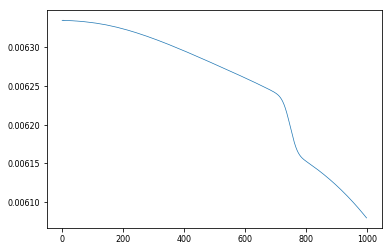

In [12]:
plt.plot(ir_data)
plt.show()